### In this notebook I will document how to assess relatedness among _O. lurida_ oysters or larval pools from QuantSeq expression data. 

In [6]:
! cat ../references/merge_contigs.awk.txt

function print_n(n)
 {
    text = ""
    for(j=0;j<n;j++) text=text"N"
    return text
 }

BEGIN {n=1} 
$0 ~ "^>" { 
    if(n<=i) {
        header = header""substr($0,2)" ";
        if(n > 1) seq=seq""print_n(1000)
        n++;
    } 
    else {
        print ">"header"\n"seq; 
        n=1; 
        header=substr($0,2); 
        seq=""
    } 

    next;
} 
{seq=seq$0} 
END {print ">"header"\n"seq;}

In [13]:
# Count number of contigs in genome to calc how many contigs to merge into super contigs 
! grep -c "^>" ../references/Olurida_v081.fa

159429


In [7]:
## Concatenate Oly genome contigs, separated by N1000 
! awk -v i=3985 -f ../references/merge_contigs.awk.txt ../references/Olurida_v081.fa > ../references/Olurida_v081_concat.fa

In [25]:
! grep -c "^>" ../references/Olurida_v081_concat.fa

grep: ../references/Olurida_v081_concat.fa: No such file or directory


## Figure out how to change headers in concatenated genome to show range of contigs

In [229]:
# Return first 10 contigs (Contig0 - Contig4) to play with 
! awk "/^>/ {n++} n>10 {exit} {print}" ../references/Olurida_v081.fa > ../test.fa

In [353]:
# Try to concatenate test genome using slightly edited python script 
! awk -v i=3 -f ../references/merge_contigs.awk.txt \
../test.fa > ../test_concat.fa
# It worked! The contig names no longer have a weird name issue (lack of space between some IDs)

In [354]:
! head -1 ../test_concat.fa | grep -o -E '[0-9]+' | head -n 1
! head -1 ../test_concat.fa | grep -o -E '[0-9]+' | tail -n 1

0
2


In [355]:
%%bash
start=$(head -1 ../test_concat.fa | grep -o -E '[0-9]+' | head -n 1) 
end=$(head -1 ../test_concat.fa | grep -o -E '[0-9]+' | tail -n 1)
echo "Contig"$start":"$end

Contig0:2


In [356]:
%%bash
grep ">" ../test_concat.fa

> Contig0 Contig1 Contig2
>Contig3 Contig4 Contig5 Contig6
>Contig7 Contig8 Contig9


In [357]:
%%bash 
start=$(head -1 ../test_concat.fa | grep -o -E '[0-9]+' | head -n 1) 
end=$(head -1 ../test_concat.fa | grep -o -E '[0-9]+' | tail -n 1)
echo "Contig"$start":"$end

Contig0:2


In [358]:
%%bash
grep ">" ../test_concat.fa > ../test_concat_contigs.txt

In [359]:
! cat ../test_concat_contigs.txt

> Contig0 Contig1 Contig2
>Contig3 Contig4 Contig5 Contig6
>Contig7 Contig8 Contig9


In [360]:
%%bash 
# Create file with new fasta headers 

n_lines=$(wc -l < ../test_concat_contigs.txt) 
lines=$(seq 1 1 $n_lines)

for i in $lines
do
NUM=$i
start=$(sed "${NUM}q;d" ../test_concat_contigs.txt | grep -o -E '[0-9]+' | head -n 1) 
end=$(sed "${NUM}q;d" ../test_concat_contigs.txt | grep -o -E '[0-9]+' | tail -n 1)
echo "Contig"$start":"$end
done > ../test_concat_newheaders.txt

In [361]:
! grep ">" ../test_concat.fa

> Contig0 Contig1 Contig2
>Contig3 Contig4 Contig5 Contig6
>Contig7 Contig8 Contig9


In [362]:
%%bash 

# Edit fasta in place 
n=$(grep ">" ../test_concat.fa | wc -l) 
n_contigs=$(seq 1 1 $n)

for i in $n_contigs
do
old=$(grep ">" ../test_concat.fa | sed "${i}q;d")
start=$(echo $old | grep -o -E '[0-9]+' | head -n 1)
end=$(echo $old | grep -o -E '[0-9]+' | tail -n 1)
new=$(echo ">Contig"$start":"$end)
sed -i -n "s|$old|$new|" ../test_concat.fa
done

In [363]:
! grep ">" ../test_concat.fa

>Contig0:2
>Contig3:6
>Contig7:9


## The above code didn't work on the whole genome, trouble shoot here

In [302]:
## Concatenate Oly genome contigs, separated by N1000 
! awk -v i=5314 -f ../references/merge_contigs.awk.txt \
../references/Olurida_v081.fa > ../references/Olurida_v081_concat.fa

In [429]:
! grep ">" ../references/Olurida_v081_concat2.fa > ../references/Olurida_v081_concat2_headers.txt

In [437]:
! grep ">" ../references/Olurida_v081_concat2.fa

> Contig0 Contig1 Contig2 Contig3 Contig4 Contig5 Contig6 Contig7 Contig8 Contig9 Contig10 Contig11 Contig12 Contig13 Contig14 Contig15 Contig16 Contig17 Contig18 Contig19 Contig20 Contig21 Contig22 Contig23 Contig24 Contig25 Contig26 Contig27 Contig28 Contig29 Contig30 Contig31 Contig32 Contig33 Contig34 Contig35 Contig36 Contig37 Contig38 Contig39 Contig40 Contig41 Contig42 Contig43 Contig44 Contig45 Contig46 Contig47 Contig48 Contig49 Contig50 Contig51 Contig52 Contig53 Contig54 Contig55 Contig56 Contig57 Contig58 Contig59 Contig60 Contig61 Contig62 Contig63 Contig64 Contig65 Contig66 Contig67 Contig68 Contig69 Contig70 Contig71 Contig72 Contig73 Contig74 Contig75 Contig76 Contig77 Contig78 Contig79 Contig80 Contig81 Contig82 Contig83 Contig84 Contig85 Contig86 Contig87 Contig88 Contig89 Contig90 Contig91 Contig92 Contig93 Contig94 Contig95 Contig96 Contig97 Contig98 Contig99 Contig100 Contig101 Contig102 Contig103 Contig104 Contig105 Contig106 Contig107 Contig108 Contig109 Contig11

>Contig5314 Contig5315 Contig5316 Contig5317 Contig5318 Contig5319 Contig5320 Contig5321 Contig5322 Contig5323 Contig5324 Contig5325 Contig5326 Contig5327 Contig5328 Contig5329 Contig5330 Contig5331 Contig5332 Contig5333 Contig5334 Contig5335 Contig5336 Contig5337 Contig5338 Contig5339 Contig5340 Contig5341 Contig5342 Contig5343 Contig5344 Contig5345 Contig5346 Contig5347 Contig5348 Contig5349 Contig5350 Contig5351 Contig5352 Contig5353 Contig5354 Contig5355 Contig5356 Contig5357 Contig5358 Contig5359 Contig5360 Contig5361 Contig5362 Contig5363 Contig5364 Contig5365 Contig5366 Contig5367 Contig5368 Contig5369 Contig5370 Contig5371 Contig5372 Contig5373 Contig5374 Contig5375 Contig5376 Contig5377 Contig5378 Contig5379 Contig5380 Contig5381 Contig5382 Contig5383 Contig5384 Contig5385 Contig5386 Contig5387 Contig5388 Contig5389 Contig5390 Contig5391 Contig5392 Contig5393 Contig5394 Contig5395 Contig5396 Contig5397 Contig5398 Contig5399 Contig5400 Contig5401 Contig5402 Contig5403 Contig540

>Contig11179 Contig11180 Contig11181 Contig11182 Contig11183 Contig11185 Contig11187 Contig11189 Contig11192 Contig11193 Contig11194 Contig11199 Contig11215 Contig11216 Contig11228 Contig11229 Contig11235 Contig11236 Contig11240 Contig11241 Contig11252 Contig11254 Contig11265 Contig11277 Contig11279 Contig11280 Contig11288 Contig11289 Contig11290 Contig11292 Contig11301 Contig11308 Contig11315 Contig11317 Contig11323 Contig11337 Contig11340 Contig11347 Contig11349 Contig11351 Contig11354 Contig11356 Contig11369 Contig11370 Contig11372 Contig11384 Contig11394 Contig11395 Contig11399 Contig11401 Contig11404 Contig11407 Contig11410 Contig11417 Contig11423 Contig11430 Contig11453 Contig11457 Contig11465 Contig11471 Contig11473 Contig11482 Contig11484 Contig11486 Contig11494 Contig11495 Contig11497 Contig11498 Contig11505 Contig11509 Contig11514 Contig11519 Contig11530 Contig11535 Contig11538 Contig11539 Contig11546 Contig11550 Contig11555 Contig11558 Contig11560 Contig11561 Contig11562 Con

>Contig21263 Contig21264 Contig21265 Contig21267 Contig21268 Contig21269 Contig21270 Contig21271 Contig21272 Contig21274 Contig21275 Contig21276 Contig21277 Contig21278 Contig21279 Contig21280 Contig21281 Contig21282 Contig21283 Contig21284 Contig21286 Contig21288 Contig21289 Contig21290 Contig21291 Contig21292 Contig21295 Contig21296 Contig21297 Contig21298 Contig21299 Contig21302 Contig21303 Contig21304 Contig21305 Contig21306 Contig21307 Contig21309 Contig21310 Contig21311 Contig21312 Contig21313 Contig21314 Contig21315 Contig21316 Contig21318 Contig21320 Contig21321 Contig21322 Contig21323 Contig21324 Contig21325 Contig21326 Contig21327 Contig21328 Contig21329 Contig21330 Contig21331 Contig21332 Contig21333 Contig21334 Contig21335 Contig21345 Contig21346 Contig21347 Contig21348 Contig21349 Contig21350 Contig21356 Contig21357 Contig21358 Contig21359 Contig21360 Contig21361 Contig21362 Contig21363 Contig21364 Contig21368 Contig21369 Contig21370 Contig21371 Contig21372 Contig21374 Con

tig22382 Contig22383 Contig22384 Contig22386 Contig22388 Contig22389 Contig22390 Contig22391 Contig22392 Contig22399 Contig22400 Contig22401 Contig22402 Contig22404 Contig22405 Contig22406 Contig22407 Contig22408 Contig22409 Contig22410 Contig22411 Contig22414 Contig22415 Contig22416 Contig22417 Contig22418 Contig22419 Contig22420 Contig22421 Contig22422 Contig22423 Contig22424 Contig22426 Contig22427 Contig22428 Contig22429 Contig22431 Contig22432 Contig22433 Contig22434 Contig22435 Contig22436 Contig22437 Contig22438 Contig22442 Contig22443 Contig22444 Contig22445 Contig22446 Contig22447 Contig22449 Contig22450 Contig22451 Contig22452 Contig22453 Contig22454 Contig22455 Contig22456 Contig22459 Contig22460 Contig22461 Contig22462 Contig22463 Contig22464 Contig22465 Contig22466 Contig22467 Contig22469 Contig22470 Contig22471 Contig22472 Contig22475 Contig22476 Contig22477 Contig22478 Contig22479 Contig22480 Contig22481 Contig22483 Contig22484 Contig22485 Contig22486 Contig22487 Contig2

>Contig28136 Contig28137 Contig28138 Contig28139 Contig28140 Contig28141 Contig28144 Contig28145 Contig28149 Contig28150 Contig28151 Contig28152 Contig28154 Contig28155 Contig28156 Contig28157 Contig28158 Contig28159 Contig28163 Contig28164 Contig28168 Contig28169 Contig28170 Contig28171 Contig28172 Contig28173 Contig28175 Contig28176 Contig28177 Contig28178 Contig28180 Contig28181 Contig28182 Contig28185 Contig28186 Contig28189 Contig28190 Contig28192 Contig28193 Contig28195 Contig28197 Contig28198 Contig28199 Contig28200 Contig28202 Contig28203 Contig28206 Contig28207 Contig28208 Contig28210 Contig28211 Contig28213 Contig28214 Contig28215 Contig28217 Contig28218 Contig28219 Contig28220 Contig28221 Contig28222 Contig28223 Contig28224 Contig28225 Contig28226 Contig28227 Contig28228 Contig28229 Contig28230 Contig28231 Contig28232 Contig28233 Contig28234 Contig28237 Contig28238 Contig28241 Contig28242 Contig28244 Contig28246 Contig28247 Contig28248 Contig28249 Contig28250 Contig28251 Con

>Contig34748 Contig34749 Contig34750 Contig34751 Contig34752 Contig34754 Contig34755 Contig34756 Contig34758 Contig34759 Contig34760 Contig34761 Contig34762 Contig34763 Contig34764 Contig34766 Contig34767 Contig34768 Contig34769 Contig34770 Contig34771 Contig34772 Contig34773 Contig34774 Contig34775 Contig34776 Contig34777 Contig34778 Contig34779 Contig34782 Contig34783 Contig34785 Contig34787 Contig34788 Contig34789 Contig34791 Contig34792 Contig34793 Contig34798 Contig34799 Contig34800 Contig34801 Contig34802 Contig34803 Contig34804 Contig34805 Contig34806 Contig34807 Contig34808 Contig34809 Contig34810 Contig34813 Contig34814 Contig34815 Contig34816 Contig34817 Contig34818 Contig34819 Contig34821 Contig34822 Contig34824 Contig34825 Contig34826 Contig34827 Contig34828 Contig34829 Contig34830 Contig34831 Contig34832 Contig34833 Contig34834 Contig34835 Contig34836 Contig34837 Contig34838 Contig34839 Contig34840 Contig34841 Contig34842 Contig34843 Contig34844 Contig34845 Contig34846 Con

>Contig41068 Contig41069 Contig41070 Contig41071 Contig41072 Contig41073 Contig41074 Contig41075 Contig41076 Contig41077 Contig41078 Contig41079 Contig41080 Contig41081 Contig41082 Contig41084 Contig41085 Contig41086 Contig41087 Contig41088 Contig41089 Contig41092 Contig41095 Contig41096 Contig41097 Contig41098 Contig41099 Contig41100 Contig41101 Contig41102 Contig41103 Contig41104 Contig41105 Contig41106 Contig41107 Contig41108 Contig41109 Contig41110 Contig41111 Contig41113 Contig41114 Contig41116 Contig41117 Contig41118 Contig41120 Contig41121 Contig41123 Contig41124 Contig41125 Contig41126 Contig41127 Contig41128 Contig41129 Contig41130 Contig41131 Contig41132 Contig41133 Contig41134 Contig41135 Contig41136 Contig41137 Contig41138 Contig41140 Contig41141 Contig41142 Contig41143 Contig41144 Contig41145 Contig41146 Contig41148 Contig41149 Contig41150 Contig41151 Contig41152 Contig41154 Contig41155 Contig41156 Contig41157 Contig41160 Contig41161 Contig41164 Contig41165 Contig41166 Con

>Contig47194 Contig47195 Contig47196 Contig47197 Contig47198 Contig47199 Contig47201 Contig47202 Contig47203 Contig47204 Contig47207 Contig47208 Contig47211 Contig47212 Contig47213 Contig47214 Contig47215 Contig47217 Contig47218 Contig47219 Contig47220 Contig47221 Contig47222 Contig47223 Contig47224 Contig47225 Contig47227 Contig47228 Contig47230 Contig47231 Contig47232 Contig47233 Contig47234 Contig47235 Contig47238 Contig47239 Contig47241 Contig47242 Contig47243 Contig47244 Contig47245 Contig47246 Contig47247 Contig47248 Contig47249 Contig47250 Contig47251 Contig47252 Contig47253 Contig47254 Contig47256 Contig47257 Contig47258 Contig47260 Contig47261 Contig47262 Contig47263 Contig47264 Contig47265 Contig47266 Contig47267 Contig47268 Contig47269 Contig47270 Contig47271 Contig47273 Contig47274 Contig47275 Contig47276 Contig47278 Contig47280 Contig47281 Contig47282 Contig47283 Contig47285 Contig47286 Contig47288 Contig47289 Contig47290 Contig47291 Contig47292 Contig47293 Contig47294 Con

>Contig53181 Contig53182 Contig53183 Contig53184 Contig53185 Contig53186 Contig53187 Contig53188 Contig53189 Contig53190 Contig53191 Contig53192 Contig53193 Contig53194 Contig53195 Contig53196 Contig53197 Contig53198 Contig53199 Contig53200 Contig53201 Contig53202 Contig53203 Contig53205 Contig53206 Contig53207 Contig53208 Contig53209 Contig53211 Contig53212 Contig53213 Contig53214 Contig53215 Contig53216 Contig53217 Contig53218 Contig53219 Contig53220 Contig53221 Contig53222 Contig53224 Contig53225 Contig53226 Contig53227 Contig53228 Contig53229 Contig53230 Contig53231 Contig53232 Contig53233 Contig53234 Contig53235 Contig53236 Contig53237 Contig53238 Contig53239 Contig53240 Contig53242 Contig53243 Contig53244 Contig53245 Contig53246 Contig53247 Contig53248 Contig53249 Contig53250 Contig53251 Contig53252 Contig53253 Contig53255 Contig53256 Contig53257 Contig53259 Contig53260 Contig53261 Contig53262 Contig53263 Contig53264 Contig53265 Contig53266 Contig53267 Contig53268 Contig53269 Con

>Contig59084 Contig59085 Contig59086 Contig59087 Contig59088 Contig59089 Contig59090 Contig59091 Contig59092 Contig59093 Contig59095 Contig59096 Contig59097 Contig59098 Contig59099 Contig59100 Contig59101 Contig59102 Contig59103 Contig59104 Contig59105 Contig59106 Contig59107 Contig59108 Contig59109 Contig59110 Contig59111 Contig59112 Contig59113 Contig59114 Contig59115 Contig59116 Contig59117 Contig59118 Contig59119 Contig59120 Contig59122 Contig59123 Contig59124 Contig59125 Contig59126 Contig59127 Contig59128 Contig59129 Contig59130 Contig59131 Contig59132 Contig59133 Contig59135 Contig59136 Contig59137 Contig59138 Contig59139 Contig59140 Contig59141 Contig59142 Contig59143 Contig59145 Contig59146 Contig59147 Contig59148 Contig59149 Contig59150 Contig59152 Contig59153 Contig59154 Contig59155 Contig59156 Contig59157 Contig59158 Contig59159 Contig59160 Contig59161 Contig59162 Contig59163 Contig59164 Contig59166 Contig59167 Contig59169 Contig59170 Contig59171 Contig59172 Contig59173 Con

>Contig64832 Contig64833 Contig64834 Contig64835 Contig64837 Contig64838 Contig64839 Contig64840 Contig64841 Contig64842 Contig64843 Contig64846 Contig64847 Contig64848 Contig64849 Contig64850 Contig64851 Contig64852 Contig64853 Contig64854 Contig64855 Contig64856 Contig64857 Contig64859 Contig64860 Contig64861 Contig64862 Contig64863 Contig64864 Contig64865 Contig64866 Contig64867 Contig64868 Contig64869 Contig64870 Contig64871 Contig64872 Contig64873 Contig64874 Contig64875 Contig64876 Contig64877 Contig64878 Contig64879 Contig64880 Contig64881 Contig64882 Contig64883 Contig64884 Contig64885 Contig64886 Contig64887 Contig64888 Contig64889 Contig64890 Contig64891 Contig64892 Contig64893 Contig64894 Contig64895 Contig64896 Contig64897 Contig64898 Contig64899 Contig64900 Contig64901 Contig64902 Contig64903 Contig64905 Contig64906 Contig64907 Contig64908 Contig64909 Contig64911 Contig64912 Contig64913 Contig64914 Contig64915 Contig64916 Contig64917 Contig64918 Contig64919 Contig64920 Con

>Contig70525 Contig70526 Contig70527 Contig70528 Contig70529 Contig70530 Contig70531 Contig70532 Contig70533 Contig70534 Contig70535 Contig70536 Contig70537 Contig70538 Contig70539 Contig70540 Contig70541 Contig70542 Contig70543 Contig70544 Contig70545 Contig70546 Contig70547 Contig70548 Contig70549 Contig70550 Contig70551 Contig70552 Contig70553 Contig70554 Contig70555 Contig70556 Contig70557 Contig70558 Contig70559 Contig70560 Contig70561 Contig70562 Contig70563 Contig70564 Contig70565 Contig70566 Contig70568 Contig70569 Contig70570 Contig70571 Contig70572 Contig70573 Contig70575 Contig70576 Contig70577 Contig70578 Contig70579 Contig70580 Contig70581 Contig70582 Contig70583 Contig70584 Contig70586 Contig70587 Contig70588 Contig70589 Contig70590 Contig70591 Contig70592 Contig70593 Contig70594 Contig70595 Contig70596 Contig70597 Contig70598 Contig70599 Contig70600 Contig70601 Contig70602 Contig70603 Contig70604 Contig70605 Contig70606 Contig70607 Contig70608 Contig70609 Contig70610 Con

>Contig76136 Contig76137 Contig76138 Contig76139 Contig76140 Contig76141 Contig76142 Contig76144 Contig76145 Contig76146 Contig76148 Contig76149 Contig76150 Contig76151 Contig76152 Contig76153 Contig76154 Contig76155 Contig76156 Contig76157 Contig76158 Contig76159 Contig76160 Contig76161 Contig76162 Contig76163 Contig76164 Contig76165 Contig76166 Contig76167 Contig76168 Contig76169 Contig76170 Contig76171 Contig76172 Contig76173 Contig76174 Contig76175 Contig76176 Contig76177 Contig76178 Contig76179 Contig76180 Contig76181 Contig76182 Contig76183 Contig76184 Contig76185 Contig76186 Contig76187 Contig76188 Contig76189 Contig76190 Contig76191 Contig76192 Contig76193 Contig76194 Contig76195 Contig76196 Contig76197 Contig76198 Contig76199 Contig76200 Contig76202 Contig76204 Contig76205 Contig76206 Contig76207 Contig76209 Contig76210 Contig76212 Contig76213 Contig76214 Contig76215 Contig76216 Contig76217 Contig76218 Contig76219 Contig76220 Contig76221 Contig76222 Contig76223 Contig76224 Con

>Contig81766 Contig81767 Contig81768 Contig81769 Contig81770 Contig81771 Contig81772 Contig81773 Contig81774 Contig81775 Contig81776 Contig81777 Contig81778 Contig81779 Contig81780 Contig81781 Contig81782 Contig81783 Contig81784 Contig81785 Contig81786 Contig81787 Contig81789 Contig81790 Contig81791 Contig81792 Contig81793 Contig81794 Contig81795 Contig81796 Contig81797 Contig81798 Contig81799 Contig81800 Contig81801 Contig81802 Contig81803 Contig81804 Contig81805 Contig81806 Contig81807 Contig81808 Contig81809 Contig81810 Contig81811 Contig81812 Contig81813 Contig81814 Contig81815 Contig81816 Contig81817 Contig81818 Contig81819 Contig81820 Contig81821 Contig81822 Contig81823 Contig81824 Contig81825 Contig81826 Contig81827 Contig81828 Contig81829 Contig81830 Contig81831 Contig81832 Contig81833 Contig81834 Contig81835 Contig81836 Contig81837 Contig81838 Contig81839 Contig81840 Contig81841 Contig81842 Contig81844 Contig81845 Contig81846 Contig81847 Contig81848 Contig81850 Contig81851 Con

>Contig87353 Contig87354 Contig87355 Contig87356 Contig87357 Contig87358 Contig87359 Contig87360 Contig87361 Contig87362 Contig87363 Contig87364 Contig87365 Contig87366 Contig87367 Contig87368 Contig87369 Contig87370 Contig87371 Contig87372 Contig87373 Contig87374 Contig87375 Contig87376 Contig87377 Contig87378 Contig87379 Contig87380 Contig87381 Contig87382 Contig87383 Contig87384 Contig87385 Contig87386 Contig87387 Contig87388 Contig87389 Contig87390 Contig87391 Contig87392 Contig87393 Contig87394 Contig87395 Contig87396 Contig87397 Contig87398 Contig87399 Contig87400 Contig87401 Contig87402 Contig87403 Contig87404 Contig87405 Contig87406 Contig87407 Contig87408 Contig87409 Contig87410 Contig87411 Contig87412 Contig87413 Contig87414 Contig87415 Contig87416 Contig87417 Contig87418 Contig87419 Contig87420 Contig87421 Contig87422 Contig87423 Contig87424 Contig87425 Contig87426 Contig87427 Contig87428 Contig87429 Contig87430 Contig87431 Contig87432 Contig87433 Contig87434 Contig87435 Con

>Contig92931 Contig92932 Contig92933 Contig92935 Contig92936 Contig92937 Contig92938 Contig92939 Contig92940 Contig92941 Contig92942 Contig92944 Contig92945 Contig92946 Contig92947 Contig92948 Contig92949 Contig92950 Contig92951 Contig92952 Contig92953 Contig92954 Contig92955 Contig92956 Contig92957 Contig92958 Contig92959 Contig92960 Contig92961 Contig92962 Contig92963 Contig92964 Contig92965 Contig92966 Contig92967 Contig92968 Contig92969 Contig92970 Contig92971 Contig92972 Contig92973 Contig92974 Contig92975 Contig92976 Contig92977 Contig92978 Contig92979 Contig92980 Contig92981 Contig92982 Contig92983 Contig92984 Contig92985 Contig92986 Contig92987 Contig92988 Contig92989 Contig92990 Contig92991 Contig92992 Contig92993 Contig92994 Contig92995 Contig92996 Contig92997 Contig92998 Contig92999 Contig93000 Contig93001 Contig93002 Contig93003 Contig93004 Contig93005 Contig93006 Contig93007 Contig93008 Contig93009 Contig93010 Contig93011 Contig93012 Contig93013 Contig93015 Contig93016 Con

>Contig98527 Contig98528 Contig98529 Contig98530 Contig98531 Contig98532 Contig98534 Contig98535 Contig98536 Contig98537 Contig98538 Contig98539 Contig98540 Contig98541 Contig98542 Contig98543 Contig98544 Contig98545 Contig98546 Contig98547 Contig98548 Contig98549 Contig98551 Contig98552 Contig98553 Contig98554 Contig98555 Contig98556 Contig98557 Contig98558 Contig98559 Contig98560 Contig98561 Contig98562 Contig98563 Contig98564 Contig98565 Contig98566 Contig98567 Contig98568 Contig98569 Contig98570 Contig98571 Contig98573 Contig98574 Contig98575 Contig98576 Contig98577 Contig98578 Contig98579 Contig98580 Contig98581 Contig98582 Contig98583 Contig98584 Contig98585 Contig98586 Contig98587 Contig98588 Contig98589 Contig98590 Contig98591 Contig98593 Contig98594 Contig98595 Contig98596 Contig98597 Contig98598 Contig98599 Contig98600 Contig98601 Contig98602 Contig98603 Contig98604 Contig98605 Contig98606 Contig98607 Contig98608 Contig98609 Contig98610 Contig98611 Contig98612 Contig98613 Con

>Contig104153 Contig104155 Contig104156 Contig104157 Contig104158 Contig104160 Contig104161 Contig104162 Contig104163 Contig104164 Contig104165 Contig104166 Contig104167 Contig104168 Contig104169 Contig104170 Contig104171 Contig104172 Contig104173 Contig104174 Contig104175 Contig104176 Contig104177 Contig104178 Contig104179 Contig104180 Contig104181 Contig104182 Contig104183 Contig104184 Contig104185 Contig104186 Contig104187 Contig104188 Contig104189 Contig104190 Contig104191 Contig104192 Contig104193 Contig104194 Contig104195 Contig104196 Contig104197 Contig104198 Contig104199 Contig104200 Contig104201 Contig104202 Contig104203 Contig104204 Contig104205 Contig104206 Contig104207 Contig104208 Contig104209 Contig104210 Contig104211 Contig104212 Contig104213 Contig104214 Contig104215 Contig104216 Contig104217 Contig104218 Contig104219 Contig104220 Contig104221 Contig104222 Contig104223 Contig104224 Contig104225 Contig104226 Contig104227 Contig104228 Contig104230 Contig104231 Contig10423

42 Contig108643 Contig108644 Contig108645 Contig108646 Contig108647 Contig108648 Contig108649 Contig108650 Contig108651 Contig108653 Contig108654 Contig108655 Contig108656 Contig108659 Contig108660 Contig108661 Contig108662 Contig108663 Contig108664 Contig108665 Contig108666 Contig108667 Contig108669 Contig108670 Contig108671 Contig108672 Contig108673 Contig108674 Contig108675 Contig108676 Contig108677 Contig108678 Contig108680 Contig108681 Contig108682 Contig108683 Contig108684 Contig108685 Contig108686 Contig108688 Contig108689 Contig108690 Contig108691 Contig108692 Contig108693 Contig108694 Contig108695 Contig108696 Contig108697 Contig108698 Contig108699 Contig108700 Contig108701 Contig108702 Contig108703 Contig108704 Contig108705 Contig108706 Contig108707 Contig108708 Contig108709 Contig108710 Contig108711 Contig108712 Contig108713 Contig108714 Contig108715 Contig108716 Contig108717 Contig108718 Contig108719 Contig108720 Contig108721 Contig108722 Contig108723 Contig108724 Contig108

>Contig109741 Contig109742 Contig109743 Contig109744 Contig109745 Contig109746 Contig109747 Contig109748 Contig109749 Contig109750 Contig109751 Contig109752 Contig109753 Contig109754 Contig109755 Contig109756 Contig109757 Contig109758 Contig109759 Contig109760 Contig109761 Contig109762 Contig109763 Contig109764 Contig109765 Contig109766 Contig109767 Contig109768 Contig109770 Contig109771 Contig109772 Contig109774 Contig109775 Contig109776 Contig109777 Contig109778 Contig109779 Contig109780 Contig109781 Contig109782 Contig109783 Contig109784 Contig109785 Contig109786 Contig109787 Contig109788 Contig109789 Contig109790 Contig109791 Contig109792 Contig109793 Contig109794 Contig109795 Contig109796 Contig109797 Contig109798 Contig109799 Contig109800 Contig109801 Contig109802 Contig109803 Contig109805 Contig109807 Contig109808 Contig109809 Contig109810 Contig109811 Contig109812 Contig109813 Contig109815 Contig109816 Contig109817 Contig109818 Contig109819 Contig109820 Contig109821 Contig10982

>Contig116188 Contig116190 Contig116191 Contig116193 Contig116194 Contig116195 Contig116198 Contig116199 Contig116200 Contig116202 Contig116203 Contig116205 Contig116207 Contig116208 Contig116209 Contig116210 Contig116211 Contig116212 Contig116213 Contig116214 Contig116215 Contig116217 Contig116219 Contig116220 Contig116221 Contig116222 Contig116223 Contig116226 Contig116227 Contig116229 Contig116231 Contig116232 Contig116233 Contig116236 Contig116237 Contig116238 Contig116240 Contig116242 Contig116243 Contig116244 Contig116245 Contig116246 Contig116247 Contig116249 Contig116250 Contig116252 Contig116255 Contig116256 Contig116257 Contig116259 Contig116261 Contig116262 Contig116263 Contig116264 Contig116265 Contig116266 Contig116268 Contig116272 Contig116274 Contig116275 Contig116276 Contig116277 Contig116278 Contig116279 Contig116280 Contig116281 Contig116282 Contig116283 Contig116284 Contig116287 Contig116288 Contig116289 Contig116290 Contig116292 Contig116293 Contig116295 Contig11629

21925 Contig121926 Contig121927 Contig121928 Contig121929 Contig121930 Contig121931 Contig121933 Contig121934 Contig121936 Contig121937 Contig121938 Contig121940 Contig121942 Contig121943 Contig121944 Contig121947 Contig121948 Contig121949 Contig121951 Contig121952 Contig121953 Contig121954 Contig121956 Contig121958 Contig121959 Contig121960 Contig121961 Contig121962 Contig121963 Contig121964 Contig121965 Contig121966 Contig121967 Contig121968 Contig121969 Contig121974 Contig121975 Contig121977 Contig121979 Contig121981 Contig121983 Contig121984 Contig121985 Contig121989 Contig121990 Contig121991 Contig121993 Contig121994 Contig121995 Contig121999 Contig122000 Contig122002 Contig122005 Contig122006 Contig122007 Contig122008 Contig122011 Contig122012 Contig122013 Contig122014 Contig122015 Contig122017 Contig122020 Contig122021 Contig122022 Contig122023 Contig122024 Contig122025 Contig122026 Contig122027 Contig122028 Contig122029 Contig122030 Contig122032 Contig122033 Contig122034 Contig

>Contig123131 Contig123133 Contig123135 Contig123136 Contig123137 Contig123138 Contig123139 Contig123140 Contig123141 Contig123143 Contig123145 Contig123146 Contig123147 Contig123148 Contig123150 Contig123151 Contig123152 Contig123153 Contig123154 Contig123155 Contig123156 Contig123157 Contig123158 Contig123159 Contig123160 Contig123161 Contig123162 Contig123164 Contig123167 Contig123168 Contig123169 Contig123170 Contig123171 Contig123172 Contig123173 Contig123174 Contig123175 Contig123176 Contig123177 Contig123178 Contig123179 Contig123180 Contig123181 Contig123183 Contig123184 Contig123185 Contig123186 Contig123187 Contig123190 Contig123192 Contig123193 Contig123195 Contig123196 Contig123197 Contig123198 Contig123199 Contig123200 Contig123202 Contig123203 Contig123204 Contig123205 Contig123206 Contig123207 Contig123208 Contig123210 Contig123212 Contig123215 Contig123216 Contig123220 Contig123221 Contig123223 Contig123224 Contig123226 Contig123227 Contig123228 Contig123229 Contig12323

>Contig129983 Contig129984 Contig129985 Contig129987 Contig129988 Contig129989 Contig129990 Contig129991 Contig129994 Contig129998 Contig129999 Contig130001 Contig130002 Contig130003 Contig130006 Contig130008 Contig130011 Contig130012 Contig130013 Contig130015 Contig130016 Contig130017 Contig130018 Contig130019 Contig130020 Contig130021 Contig130022 Contig130023 Contig130024 Contig130025 Contig130026 Contig130027 Contig130028 Contig130030 Contig130031 Contig130032 Contig130033 Contig130034 Contig130035 Contig130037 Contig130038 Contig130040 Contig130041 Contig130042 Contig130043 Contig130044 Contig130046 Contig130047 Contig130048 Contig130049 Contig130050 Contig130052 Contig130053 Contig130054 Contig130055 Contig130057 Contig130060 Contig130061 Contig130063 Contig130064 Contig130065 Contig130067 Contig130068 Contig130070 Contig130071 Contig130072 Contig130075 Contig130076 Contig130077 Contig130078 Contig130079 Contig130080 Contig130081 Contig130082 Contig130085 Contig130086 Contig13008

>Contig136897 Contig136898 Contig136899 Contig136900 Contig136901 Contig136903 Contig136904 Contig136905 Contig136907 Contig136910 Contig136911 Contig136913 Contig136915 Contig136916 Contig136917 Contig136918 Contig136919 Contig136920 Contig136921 Contig136922 Contig136924 Contig136926 Contig136927 Contig136928 Contig136930 Contig136932 Contig136933 Contig136934 Contig136935 Contig136936 Contig136938 Contig136939 Contig136940 Contig136941 Contig136942 Contig136943 Contig136946 Contig136947 Contig136950 Contig136951 Contig136952 Contig136954 Contig136956 Contig136957 Contig136960 Contig136961 Contig136964 Contig136965 Contig136966 Contig136967 Contig136968 Contig136970 Contig136971 Contig136972 Contig136973 Contig136974 Contig136976 Contig136977 Contig136979 Contig136980 Contig136981 Contig136982 Contig136983 Contig136984 Contig136985 Contig136986 Contig136987 Contig136989 Contig136991 Contig136992 Contig136993 Contig136994 Contig136995 Contig136998 Contig136999 Contig137000 Contig13700

38247 Contig138249 Contig138252 Contig138253 Contig138254 Contig138255 Contig138256 Contig138258 Contig138259 Contig138260 Contig138261 Contig138263 Contig138264 Contig138265 Contig138266 Contig138267 Contig138268 Contig138269 Contig138271 Contig138273 Contig138274 Contig138275 Contig138277 Contig138283 Contig138284 Contig138285 Contig138287 Contig138290 Contig138291 Contig138293 Contig138294 Contig138295 Contig138296 Contig138297 Contig138298 Contig138299 Contig138300 Contig138301 Contig138302 Contig138303 Contig138304 Contig138305 Contig138307 Contig138308 Contig138309 Contig138310 Contig138311 Contig138313 Contig138314 Contig138315 Contig138316 Contig138317 Contig138318 Contig138322 Contig138323 Contig138324 Contig138325 Contig138327 Contig138329 Contig138330 Contig138333 Contig138334 Contig138335 Contig138337 Contig138338 Contig138339 Contig138340 Contig138341 Contig138342 Contig138343 Contig138344 Contig138345 Contig138346 Contig138347 Contig138348 Contig138349 Contig138350 Contig

>Contig143780 Contig143782 Contig143783 Contig143784 Contig143785 Contig143786 Contig143787 Contig143788 Contig143791 Contig143792 Contig143793 Contig143794 Contig143795 Contig143796 Contig143798 Contig143799 Contig143800 Contig143802 Contig143803 Contig143804 Contig143805 Contig143806 Contig143807 Contig143808 Contig143811 Contig143812 Contig143813 Contig143814 Contig143815 Contig143817 Contig143818 Contig143819 Contig143820 Contig143821 Contig143822 Contig143823 Contig143824 Contig143825 Contig143826 Contig143827 Contig143829 Contig143830 Contig143831 Contig143832 Contig143833 Contig143835 Contig143837 Contig143838 Contig143839 Contig143840 Contig143841 Contig143842 Contig143843 Contig143844 Contig143845 Contig143847 Contig143848 Contig143849 Contig143850 Contig143851 Contig143854 Contig143855 Contig143856 Contig143857 Contig143858 Contig143860 Contig143861 Contig143862 Contig143866 Contig143868 Contig143870 Contig143871 Contig143872 Contig143873 Contig143875 Contig143876 Contig14387

>Contig150711 Contig150712 Contig150713 Contig150714 Contig150715 Contig150716 Contig150717 Contig150718 Contig150719 Contig150720 Contig150721 Contig150722 Contig150723 Contig150724 Contig150727 Contig150728 Contig150730 Contig150732 Contig150733 Contig150734 Contig150735 Contig150736 Contig150738 Contig150739 Contig150740 Contig150741 Contig150742 Contig150743 Contig150744 Contig150746 Contig150747 Contig150748 Contig150749 Contig150752 Contig150753 Contig150754 Contig150755 Contig150756 Contig150757 Contig150758 Contig150760 Contig150761 Contig150763 Contig150764 Contig150765 Contig150766 Contig150767 Contig150768 Contig150770 Contig150772 Contig150773 Contig150774 Contig150775 Contig150776 Contig150778 Contig150779 Contig150781 Contig150782 Contig150784 Contig150786 Contig150788 Contig150789 Contig150791 Contig150792 Contig150793 Contig150794 Contig150795 Contig150796 Contig150797 Contig150798 Contig150799 Contig150800 Contig150801 Contig150802 Contig150805 Contig150807 Contig15080

>Contig166374 Contig166380 Contig166382 Contig166384 Contig166387 Contig166394 Contig166396 Contig166398 Contig166400 Contig166405 Contig166410 Contig166412 Contig166413 Contig166414 Contig166421 Contig166424 Contig166426 Contig166431 Contig166434 Contig166438 Contig166439 Contig166440 Contig166451 Contig166461 Contig166463 Contig166465 Contig166470 Contig166471 Contig166472 Contig166480 Contig166491 Contig166492 Contig166494 Contig166500 Contig166501 Contig166504 Contig166505 Contig166509 Contig166514 Contig166515 Contig166517 Contig166522 Contig166525 Contig166527 Contig166528 Contig166533 Contig166536 Contig166539 Contig166540 Contig166541 Contig166543 Contig166544 Contig166545 Contig166546 Contig166547 Contig166549 Contig166550 Contig166558 Contig166560 Contig166561 Contig166566 Contig166568 Contig166570 Contig166571 Contig166576 Contig166577 Contig166578 Contig166580 Contig166583 Contig166589 Contig166591 Contig166593 Contig166595 Contig166597 Contig166598 Contig166602 Contig16660

>Contig181898 Contig181900 Contig181901 Contig181905 Contig181908 Contig181910 Contig181927 Contig181928 Contig181931 Contig181934 Contig181935 Contig181936 Contig181939 Contig181940 Contig181943 Contig181944 Contig181945 Contig181948 Contig181950 Contig181953 Contig181958 Contig181959 Contig181963 Contig181964 Contig181969 Contig181971 Contig181972 Contig181973 Contig181976 Contig181978 Contig181979 Contig181985 Contig181988 Contig181989 Contig181991 Contig181994 Contig182004 Contig182005 Contig182006 Contig182008 Contig182009 Contig182010 Contig182012 Contig182014 Contig182015 Contig182018 Contig182023 Contig182024 Contig182025 Contig182032 Contig182033 Contig182034 Contig182036 Contig182039 Contig182041 Contig182042 Contig182046 Contig182047 Contig182048 Contig182051 Contig182052 Contig182053 Contig182057 Contig182064 Contig182068 Contig182070 Contig182071 Contig182075 Contig182077 Contig182080 Contig182081 Contig182083 Contig182087 Contig182088 Contig182091 Contig182093 Contig18209

>Contig197431 Contig197434 Contig197440 Contig197441 Contig197442 Contig197446 Contig197449 Contig197453 Contig197454 Contig197457 Contig197461 Contig197465 Contig197467 Contig197469 Contig197473 Contig197475 Contig197478 Contig197479 Contig197481 Contig197483 Contig197484 Contig197487 Contig197491 Contig197493 Contig197495 Contig197499 Contig197502 Contig197504 Contig197508 Contig197509 Contig197511 Contig197512 Contig197513 Contig197517 Contig197519 Contig197520 Contig197524 Contig197527 Contig197529 Contig197533 Contig197535 Contig197540 Contig197541 Contig197542 Contig197549 Contig197559 Contig197562 Contig197564 Contig197565 Contig197566 Contig197571 Contig197574 Contig197578 Contig197579 Contig197580 Contig197584 Contig197585 Contig197587 Contig197589 Contig197591 Contig197598 Contig197604 Contig197605 Contig197607 Contig197608 Contig197612 Contig197626 Contig197627 Contig197629 Contig197631 Contig197635 Contig197636 Contig197639 Contig197641 Contig197648 Contig197652 Contig19765

>Contig213221 Contig213224 Contig213225 Contig213226 Contig213229 Contig213233 Contig213236 Contig213243 Contig213244 Contig213246 Contig213248 Contig213250 Contig213251 Contig213252 Contig213253 Contig213255 Contig213266 Contig213267 Contig213270 Contig213273 Contig213275 Contig213282 Contig213283 Contig213285 Contig213287 Contig213302 Contig213303 Contig213310 Contig213315 Contig213322 Contig213325 Contig213326 Contig213327 Contig213328 Contig213330 Contig213331 Contig213333 Contig213335 Contig213338 Contig213339 Contig213341 Contig213342 Contig213343 Contig213345 Contig213347 Contig213348 Contig213350 Contig213353 Contig213354 Contig213356 Contig213357 Contig213366 Contig213369 Contig213370 Contig213371 Contig213372 Contig213375 Contig213380 Contig213382 Contig213383 Contig213386 Contig213387 Contig213388 Contig213391 Contig213395 Contig213396 Contig213399 Contig213402 Contig213404 Contig213405 Contig213406 Contig213412 Contig213413 Contig213417 Contig213418 Contig213419 Contig21342

>Contig398123 Contig398172 Contig398188 Contig398235 Contig398239 Contig398301 Contig398332 Contig398345 Contig398376 Contig398392 Contig398565 Contig398599 Contig398600 Contig398604 Contig398621 Contig398648 Contig398754 Contig398787 Contig398816 Contig398896 Contig398897 Contig398922 Contig398959 Contig398980 Contig399161 Contig399279 Contig399280 Contig399312 Contig399393 Contig399406 Contig399482 Contig399514 Contig399531 Contig399562 Contig399584 Contig399673 Contig399714 Contig399753 Contig399775 Contig399808 Contig399819 Contig399849 Contig399905 Contig399957 Contig400035 Contig400081 Contig400082 Contig400258 Contig400316 Contig400327 Contig400456 Contig400516 Contig400586 Contig400588 Contig400594 Contig400642 Contig400668 Contig400687 Contig400841 Contig400867 Contig400870 Contig400922 Contig400973 Contig400979 Contig400980 Contig401046 Contig401057 Contig401097 Contig401148 Contig401184 Contig401213 Contig401263 Contig401360 Contig401412 Contig401424 Contig401502 Contig40160

6 Contig560584 Contig560608 Contig560709 Contig560739 Contig560756 Contig560794 Contig560831 Contig560867 Contig560989 Contig560995 Contig561164 Contig561244 Contig561278 Contig561279 Contig561327 Contig561358 Contig561374 Contig561463 Contig561504 Contig561650 Contig561712 Contig561780 Contig561877 Contig561910 Contig561931 Contig561937 Contig561962 Contig561983 Contig562060 Contig562112 Contig562135 Contig562143 Contig562332 Contig562336 Contig562343 Contig562368 Contig562530 Contig562553 Contig562560 Contig562576 Contig562626 Contig562655 Contig562668 Contig562759 Contig562888 Contig562915 Contig563010 Contig563024 Contig563033 Contig563052 Contig563172 Contig563244 Contig563286 Contig563316 Contig563364 Contig563411 Contig563450 Contig563521 Contig563558 Contig563805 Contig563826 Contig563862 Contig563969 Contig563982 Contig564166 Contig564305 Contig564316 Contig564333 Contig564398 Contig564636 Contig564754 Contig564785 Contig564787 Contig564791 Contig564814 Contig564909 Contig5649

In [441]:
! cat ../references/Olurida_v081_concat.fa | tr -d "[:blank:]" > ../references/Olurida_v081_concat_rehead.fa #remove all horizontal white spaces between contigIDs

^C


In [454]:
pwd

'/Volumes/Bumblebee/O.lurida_QuantSeq-2020/notebooks'

In [474]:
%%bash 

cat ../references/Olurida_v081_concat.fa | tr -d "[:blank:]" > ../references/Olurida_v081_concat_rehead.fa #remove all horizontal white spaces between contigIDs

n_contigs_old=$(grep ">" ../references/Olurida_v081.fa | wc -l) #number of contigs in original fasta 
d="${n_contigs_old//[^[:digit:]]/}" #Return ID of last/highest number contig
digits=$(echo ${#d}) #number of digits in the last contig
n_contigs_new=$(grep ">" ../references/Olurida_v081_concat_rehead.fa | wc -l) #number of contigs in concatenated genome
n=$(seq 1 1 $n_contigs_new) #vector of 1:# of contigs in concat. genome

# loop over each new contig header, paste first and last ID # together and replace concat header with new ID 
for i in $n
do
old=$(grep ">" ../references/Olurida_v081_concat_rehead.fa | sed "${i}q;d")
start=$(echo $old | grep -o -E '[0-9]{1,6}' | head -n 1) #If needed, change the 6 to match the value in $digits 
startID=$(echo ">Contig"$start)
end=$(echo $old | grep -o -E '[0-9]{1,6}' | tail -n 1) #If needed, change the 6 to match the value in $digits 
new=$(echo ">Contig"$start":"$end)
sed -i .bak "s|$startID.*|$new|" ../references/Olurida_v081_concat_rehead.fa # edit fasta in place. 
done

30
30
2


In [465]:
! grep ">" ../references/Olurida_v081_concat_rehead.fa

>Contig0:5313
>Contig5314:11178
>Contig11179:21262
>Contig21263:28135
>Contig28136:34745
>Contig34748:41067
>Contig41068:47193
>Contig47194:53180
>Contig53181:59083
>Contig59084:64831
>Contig64832:70524
>Contig70525:76135
>Contig76136:81765
>Contig81766:87352
>Contig87353:92929
>Contig92931:98526
>Contig98527:104152
>Contig104153:109739
>Contig109741:116186
>Contig116188:123130
>Contig123131:129982
>Contig129983:136896
>Contig136897:143777
>Contig143780:150710
>Contig150711:166372
>Contig166374:181896
>Contig181898:197428
>Contig197431:213218
>Contig213221:398012
>Contig398123:696856


In [470]:
! wc -l ../references/Olurida_v081_concat_rehead.fa

      60 ../references/Olurida_v081_concat_rehead.fa


In [485]:
! grep ">" ../references/Olurida_v081_concat_rehead.fa | tr -d '>,' > intervals_list_test.bed

In [486]:
! cat intervals_list_test.bed

Contig0:5313
Contig5314:11178
Contig11179:21262
Contig21263:28135
Contig28136:34745
Contig34748:41067
Contig41068:47193
Contig47194:53180
Contig53181:59083
Contig59084:64831
Contig64832:70524
Contig70525:76135
Contig76136:81765
Contig81766:87352
Contig87353:92929
Contig92931:98526
Contig98527:104152
Contig104153:109739
Contig109741:116186
Contig116188:123130
Contig123131:129982
Contig129983:136896
Contig136897:143777
Contig143780:150710
Contig150711:166372
Contig166374:181896
Contig181898:197428
Contig197431:213218
Contig213221:398012
Contig398123:696856


In [487]:
! samtools faidx ../references/Olurida_v081_concat_rehead.fa

In [488]:
! head ../references/Olurida_v081_concat_rehead.fa.fai

Contig0:5313	106057568	14	106057568	106057569
Contig5314:11178	32396294	106057601	32396294	32396295
Contig11179:21262	74802179	138453915	74802179	74802180
Contig21263:28135	88175040	213256114	88175040	88175041
Contig28136:34745	84525363	301431174	84525363	84525364
Contig34748:41067	78377417	385956557	78377417	78377418
Contig41068:47193	72754245	464333994	72754245	72754246
Contig47194:53180	65948428	537088259	65948428	65948429
Contig53181:59083	60237193	603036707	60237193	60237194
Contig59084:64831	55180531	663273920	55180531	55180532


In [490]:
! awk 'BEGIN {FS="\t"}; {print $1 FS "0" FS $2}' ../references/Olurida_v081_concat_rehead.fa.fai > intervals_list_test.bed

In [491]:
! cat intervals_list_test.bed

Contig0:5313	0	106057568
Contig5314:11178	0	32396294
Contig11179:21262	0	74802179
Contig21263:28135	0	88175040
Contig28136:34745	0	84525363
Contig34748:41067	0	78377417
Contig41068:47193	0	72754245
Contig47194:53180	0	65948428
Contig53181:59083	0	60237193
Contig59084:64831	0	55180531
Contig64832:70524	0	47545474
Contig70525:76135	0	43321579
Contig76136:81765	0	39298155
Contig81766:87352	0	39416821
Contig87353:92929	0	32328533
Contig92931:98526	0	31096151
Contig98527:104152	0	30683881
Contig104153:109739	0	29579713
Contig109741:116186	0	26186201
Contig116188:123130	0	24216267
Contig123131:129982	0	24656739
Contig129983:136896	0	24743631
Contig136897:143777	0	24221253
Contig143780:150710	0	23826562
Contig150711:166372	0	22916791
Contig166374:181896	0	23040393
Contig181898:197428	0	22544876
Contig197431:213218	0	22908649
Contig213221:398012	0	24194835
Contig398123:696856	0	24977105


## sbatch -p srlab -A srlab 20210310_genotype-RNASeq.sh

## Align QuantSeq reads to concatenated genome

In [ ]:
### creating bowtie2 index for Oly genome v081:
! bowtie2-build \
{workingdir}references/Olurida_v081.fa \
Olurida_v081.fa

In [ ]:
%%bash 
# Align reads to concatenated genome 
for file in ../cutadapt/*.trim.fastq
do
sample="$(basename -a $file | cut -d "." -f 1)"
map_file="$sample.bowtie.sam"

# run Bowtie2 on each file
bowtie2 \
--local \
-x Olurida_v081.fa \
--sensitive-local \
--threads 8 \
--no-unal \
-k 5 \
-U $file \
-S mapped/$map_file; \
done >> mapped/bowtieout.txt 2>&1

In [ ]:
%%bash
# Convert sam to bam 
for file in qc-processing/bowtie/mapped/*.bowtie.sam
do
sample="$(basename -a $file | cut -d "." -f 1)"
sorted_file="$sample.sorted.bam"
samtools view -b $file | samtools sort -o qc-processing/bowtie/mapped-sorted/$sorted_file
done

## Deduplicate

In [ ]:
%%bash 
# deduplicate using picard, output will have duplicates removed 

for file in ../qc-processing/bowtie/mapped-sorted/1*sorted.bam
do
sample="$(basename -a $file | cut -b 1,2,3)"
dedup_file="$sample.dedup.bam"

/Applications/bioinformatics/gatk-4.1.9.0/gatk MarkDuplicates \
I=$file \
O="../qc-processing/gatk/$dedup_file" \
M="../qc-processing/gatk/$sample.dup_metrics.txt" \
REMOVE_DUPLICATES=true
done >> "../qc-processing/gatk/dedup_stout.txt" 2>&1

In [ ]:
# Check out metrics for each sample (last column indicates duplication %) 
! grep "Unknown Library" ../qc-processing/gatk/*.dup_metrics.txt

## Split reads spanning splicing events using [`SplitNCigarReads`](https://gatk.broadinstitute.org/hc/en-us/articles/360036858811-SplitNCigarReads). 

In [ ]:
# Create a FASTA sequence dictionary file for O.lurida genome (needed by gatk)
! {gatk} CreateSequenceDictionary -R ../references/Olurida_v081.fa -O ../references/Olurida_v081.dict

## Add read group - need to add diff read group for each lane (necessary?)

In [ ]:
%%bash

for file in ../qc-processing/gatk/*dedup-split.bam
do
sample="$(basename -a $file | cut -b 1,2,3)"
results_file="$sample.dedup-split-RG.bam" 

# add read group info to headers, specifying sample names 
/Applications/bioinformatics/gatk-4.1.9.0/gatk AddOrReplaceReadGroups \
I=../qc-processing/gatk/$sample.dedup-split.bam \
O=../qc-processing/gatk/$sample.dedup-split-RG.bam \
RGID=1 \
RGLB=$sample \
RGPL=ILLUMINA \
RGPU=unit1 \
RGSM=$sample
done >> "../qc-processing/gatk/AddReadGroup_stout.txt" 2>&1

## Index

In [ ]:
%%bash
for file in *dedup-split-RG.bam
do
samtools index $file 
done

## Call variants

In [ ]:
%%bash

for file in *dedup-split-RG.bam
do
sample="$(basename -a $file | cut -b 1,2,3)"

# add read group info to headers, specifying sample names 
/Applications/bioinformatics/gatk-4.1.9.0/gatk HaplotypeCaller \
-R ../../references/Olurida_v081.fa \
-I $sample.dedup-split-RG.bam \
-O $sample.variants.g.vcf \
-ERC GVCF
done >> "HaplotypeCaller_stout.txt" 2>&1

## Aggregate GVCF files using [GenomicsDBImport](https://gatk.broadinstitute.org/hc/en-us/articles/360035889971)

This will be done via a slurm script [20210215_gatk_GenomicsDBImport.sh](20210215_gatk_GenomicsDBImport.sh) 

```
#!/bin/bash
## Job Name
#SBATCH --job-name=QuantSeq-gatk-GenomicsDBImport
## Allocation Definition 
#SBATCH --account=srlab
#SBATCH --partition=srlab
## Resources
## Nodes 
#SBATCH --nodes=1
## Walltime (days-hours:minutes:seconds format)
#SBATCH --time=6-00:00:00
## Memory per node
#SBATCH --mem=100G
##turn on e-mail notification
#SBATCH --mail-type=ALL
#SBATCH --mail-user=lhs3@uw.edu
## Specify the working directory for this job
#SBATCH --chdir=/gscratch/srlab/lhs3/inputs/20210215_gatk/

# This script Import single-sample GVCFs into GenomicsDB before joint genotyping in gatk
# All necesasry files are in the same directory. 

! /gscratch/srlab/programs/gatk-4.1.9.0/gatk GenomicsDBImport \
--genomicsdb-workspace-path GenomicsDB/ \
-L intervals_list.bed \
--sample-name-map sample_map.txt \
--reader-threads 40
```

## Joint genotype using GenotypeGVCFs

```
#!/bin/bash
## Job Name
#SBATCH --job-name=QuantSeq-gatk-GenotypeGVCFs
## Allocation Definition 
#SBATCH --account=srlab
#SBATCH --partition=srlab
## Resources
## Nodes 
#SBATCH --nodes=1
## Walltime (days-hours:minutes:seconds format)
#SBATCH --time=6-00:00:00
## Memory per node
#SBATCH --mem=100G
##turn on e-mail notification
#SBATCH --mail-type=ALL
#SBATCH --mail-user=lhs3@uw.edu
## Specify the working directory for this job
#SBATCH --chdir=/gscratch/srlab/lhs3/inputs/20210215_gatk/

# This script Import single-sample GVCFs into GenomicsDB before joint genotyping in gatk
# All necesasry files are in the same directory. 

! /gscratch/srlab/programs/gatk-4.1.9.0/gatk GenotypeGVCFs \
-R Olurida_v081.fa \
-V gendb://GenomicsDB \
-O juvenile_genotypes.vcf.gz
```

## Hard Filter Variants 

In [1]:
! {gatk} VariantFiltration \
-R ../references/Olurida_v081.fa \
-V ../qc-processing/gatk/juvenile_genotypes-SNPs.vcf.gz \
-O ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz \
--filter-name "FS" \
--filter "FS > 60.0" \
--filter-name "QD" \
--filter "QD < 2.0" \
--filter-name "QUAL30" \
--filter "QUAL < 30.0" \
--filter-name "SOR3" \
--filter "SOR > 3.0" \
--filter-name "DP15" \
--filter "DP < 15" \
--filter-name "DP150" \
--filter "DP < 150" \
--filter-name "AF30" \
--filter "AF < 0.30"

/bin/sh: {gatk}: command not found


## Select only SNPs that passed hard filtering

In [ ]:
# Now create another filtered .vcf that excludes any variants not meeting the above hard-filter settings 
! {gatk} SelectVariants \
-R ../references/Olurida_v081.fa \
-V ../qc-processing/gatk/juvenile_genotypes-SNPs-filtered.vcf.gz \
--exclude-filtered TRUE \
--select-type-to-include SNP \
-O ../qc-processing/gatk/juvenile_genotypes-SNPs-filteredtrue.vcf.gz

## Combined all of the above into a slurm script, transferred my trimmed .fastq files and slurm script to Mox, then executed it via: `sbatch -p srlab -A srlab 20210310_genotype-RNASeq.sh`

In [19]:
!echo "current working directory:" pwd

current working directory: pwd


## Transferred resulting .vcf files from Mox. Here I run them through SNPRelate 

In [492]:
# If running R for the first time since last opening up this notebook, execute this chunk
%load_ext rpy2.ipython

In [597]:
%%R
# load packages
require(tidyverse)
require(SNPRelate)
require(SeqArray)
require(plotly)
require(ggplot2)

R[write to console]: Loading required package: plotly

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




In [642]:
cd /Volumes/Bumblebee/O.lurida_QuantSeq-2020/notebooks/

/Volumes/Bumblebee/O.lurida_QuantSeq-2020/notebooks


In [643]:
! gzip -dk ../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf.gz

In [645]:
! ls ../qc-processing/gatk/Olurida_QuantSeq2020_genotypes*

../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf.gz
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf.gz.tbi
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered.vcf.gz
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered.vcf.gz.tbi
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes.vcf.gz
../qc-processing/gatk/Olurida_QuantSeq2020_genotypes.vcf.gz.tbi


In [688]:
! head -n 100 ../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf

##fileformat=VCFv4.2
##ALT=<ID=NON_REF,Description="Represents any possible alternative allele not already represented at this location by REF and ALT">
##FILTER=<ID=AF30,Description="AF < 0.30">
##FILTER=<ID=DP15,Description="DP < 15">
##FILTER=<ID=DP150,Description="DP > 150">
##FILTER=<ID=FS,Description="FS > 60.0">
##FILTER=<ID=LowQual,Description="Low quality">
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=QD,Description="QD < 2.0">
##FILTER=<ID=QUAL30,Description="QUAL < 30.0">
##FILTER=<ID=SOR3,Description="SOR > 3.0">
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=MIN_DP,Number=1,Type=Integer,Description="Minimum DP observed 

In [646]:
%%R
# 
vcf.fn <- "../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf"
vcf.fn

[1] "../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf"


In [647]:
%%R
# if you get an error with the next chunk, run this one 
snpgdsClose(genofile)

In [648]:
%%R
# Reformat - note, can't re-run this chucnk
snpgdsVCF2GDS(vcf.fn, "../qc-processing/gatk/genotypes.gds", method="biallelic.only")

Start file conversion from VCF to SNP GDS ...
Method: exacting biallelic SNPs
Number of samples: 146
Parsing "../qc-processing/gatk/Olurida_QuantSeq2020_genotypes-filtered-true.vcf" ...
	import 24351 variants.
+ genotype   { Bit2 146x24351, 868.0K } *
Optimize the access efficiency ...
Clean up the fragments of GDS file:
    open the file '../qc-processing/gatk/genotypes.gds' (1002.2K)
    # of fragments: 48
    save to '../qc-processing/gatk/genotypes.gds.tmp'
    rename '../qc-processing/gatk/genotypes.gds.tmp' (1001.9K, reduced: 336B)
    # of fragments: 20


In [649]:
%%R
# View summary 
snpgdsSummary("../qc-processing/gatk/genotypes.gds")

The file name: /Volumes/Bumblebee/O.lurida_QuantSeq-2020/qc-processing/gatk/genotypes.gds 
The total number of samples: 146 
The total number of SNPs: 24351 
SNP genotypes are stored in SNP-major mode (Sample X SNP).


In [650]:
%%R
#open gds and check out genofile contents 
(genofile <- snpgdsOpen("../qc-processing/gatk/genotypes.gds"))

File: /Volumes/Bumblebee/O.lurida_QuantSeq-2020/qc-processing/gatk/genotypes.gds (1001.9K)
+    [  ] *
|--+ sample.id   { Str8 146 LZMA_ra(41.4%), 249B }
|--+ snp.id   { Int32 24351 LZMA_ra(8.01%), 7.6K }
|--+ snp.rs.id   { Str8 24351 LZMA_ra(0.58%), 149B }
|--+ snp.position   { Int32 24351 LZMA_ra(59.7%), 56.8K }
|--+ snp.chromosome   { Str8 24351 LZMA_ra(0.13%), 581B }
|--+ snp.allele   { Str8 24351 LZMA_ra(12.7%), 12.1K }
|--+ genotype   { Bit2 146x24351, 868.0K } *
\--+ snp.annot   [  ]
   |--+ qual   { Float32 24351 LZMA_ra(57.1%), 54.3K }
   \--+ filter   { Str8 24351 LZMA_ra(0.14%), 177B }


In [697]:
%%R
head(read.gdsn(index.gdsn(genofile, "sample.id")), -1)

  [1] "034" "035" "037" "039" "041" "043" "044" "045" "046" "047" "137" "139"
 [13] "140" "141" "156" "159" "161" "162" "168" "169" "171" "172" "181" "183"
 [25] "184" "185" "291" "292" "293" "294" "295" "296" "298" "299" "301" "302"
 [37] "303" "304" "305" "306" "307" "308" "309" "311" "312" "313" "314" "315"
 [49] "316" "317" "318" "319" "321" "322" "323" "324" "325" "326" "327" "328"
 [61] "329" "331" "332" "333" "334" "335" "336" "337" "338" "339" "341" "342"
 [73] "343" "344" "345" "346" "347" "348" "349" "401" "402" "403" "404" "411"
 [85] "412" "413" "414" "421" "431" "432" "434" "441" "442" "443" "444" "445"
 [97] "451" "452" "453" "461" "462" "471" "472" "473" "474" "475" "476" "477"
[109] "481" "482" "483" "484" "485" "487" "488" "489" "490" "491" "492" "506"
[121] "513" "521" "522" "523" "524" "525" "526" "527" "528" "529" "531" "532"
[133] "533" "541" "542" "543" "551" "552" "553" "554" "561" "562" "563" "564"
[145] "565"


In [699]:
%%R
# Prune SNPs in linkage-disequilibrium, remove negative control
snpset <- snpgdsLDpruning(genofile, ld.threshold=0.2, autosome.only=FALSE, sample.id=head(read.gdsn(index.gdsn(genofile, "sample.id")), -1))

SNP pruning based on LD:
Excluding 5,748 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 145
    # of SNPs: 18,603
    using 1 thread
    sliding window: 500,000 basepairs, Inf SNPs
    |LD| threshold: 0.2
    method: composite
Chromosome Contig0_5313: 8.07%, 216/2,675
Chromosome Contig104153_109739: 11.78%, 51/433
Chromosome Contig109741_116186: 12.21%, 42/344
Chromosome Contig11179_21262: 7.33%, 141/1,924
Chromosome Contig116188_123130: 12.46%, 39/313
Chromosome Contig123131_129982: 13.41%, 44/328
Chromosome Contig129983_136896: 12.93%, 41/317
Chromosome Contig136897_143777: 14.54%, 41/282
Chromosome Contig143780_150710: 12.72%, 36/283
Chromosome Contig150711_166372: 13.31%, 39/293
Chromosome Contig166374_181896: 12.75%, 39/306
Chromosome Contig181898_197428: 11.93%, 34/285
Chromosome Contig197431_213218: 12.95%, 36/278
Chromosome Contig21263_28135: 7.89%, 174/2,206
Chromosome Contig213221_398012: 13.33%, 38/285
Chromosome Contig28136_34745: 8.80%, 170/1,931
C

### 2,340 markers will be used for PCA since they are deemed to NOT be in linkage disequilibrium

In [700]:
%%R
str(snpset)[[1:10,]]

List of 30
 $ chrContig0_5313       : int [1:216] 7 26 30 37 45 55 61 74 97 114 ...
 $ chrContig104153_109739: int [1:51] 2677 2681 2697 2709 2714 2730 2731 2739 2746 2751 ...
 $ chrContig109741_116186: int [1:42] 3118 3123 3137 3143 3150 3159 3169 3175 3179 3192 ...
 $ chrContig11179_21262  : int [1:141] 3454 3461 3470 3482 3485 3499 3513 3524 3532 3533 ...
 $ chrContig116188_123130: int [1:39] 5398 5402 5408 5414 5422 5428 5434 5447 5450 5459 ...
 $ chrContig123131_129982: int [1:44] 5702 5714 5717 5720 5723 5736 5744 5748 5757 5767 ...
 $ chrContig129983_136896: int [1:41] 6024 6035 6040 6054 6058 6068 6079 6083 6092 6095 ...
 $ chrContig136897_143777: int [1:41] 6339 6350 6358 6365 6372 6385 6388 6392 6401 6408 ...
 $ chrContig143780_150710: int [1:36] 6620 6624 6631 6635 6639 6652 6674 6676 6680 6694 ...
 $ chrContig150711_166372: int [1:39] 6901 6907 6916 6922 6931 6936 6941 6948 6950 6956 ...
 $ chrContig166374_181896: int [1:39] 7196 7210 7211 7221 7240 7248 7254 7263 7276 7282

In [701]:
%%R
snpset.id <- unlist(unname(snpset))
head(snpset.id)

[1]  7 26 30 37 45 55


In [702]:
%%R
# PCA
pca <- snpgdsPCA(genofile, snp.id=snpset.id, num.thread=2, autosome.only=FALSE, sample.id=head(read.gdsn(index.gdsn(genofile, "sample.id")), -1))

Principal Component Analysis (PCA) on genotypes:
Excluding 0 SNP (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 145
    # of SNPs: 2,340
    using 2 threads
    # of principal components: 32
PCA:    the sum of all selected genotypes (0,1,2) = 36664
CPU capabilities: Double-Precision SSE2
Mon Mar 22 22:50:30 2021    (internal increment: 6976)
[==================================================] 100%, completed, 0s  
Mon Mar 22 22:50:30 2021    Begin (eigenvalues and eigenvectors)
Mon Mar 22 22:50:30 2021    Done.


In [703]:
%%R
pc.percent <- pca$varprop*100
head(round(pc.percent, 2))

[1] 2.62 2.27 1.98 1.86 1.76 1.70


In [714]:
%%R
# make a data.frame
tab <- data.frame(sample.id = pca$sample.id,
    EV1 = pca$eigenvect[,1],    # the first eigenvector
    EV2 = pca$eigenvect[,2],    # the second eigenvector
    stringsAsFactors = FALSE)
head(tab)

  sample.id          EV1          EV2
1       034 -0.018044573 -0.010613047
2       035 -0.012117596 -0.003369871
3       037  0.001824548  0.007457283
4       039 -0.032240384  0.019036312
5       041 -0.027933628 -0.010082429
6       043 -0.020326801 -0.022077126


In [715]:
%%R
# check out sample order
tab

    sample.id           EV1           EV2
1         034 -0.0180445733 -0.0106130473
2         035 -0.0121175965 -0.0033698707
3         037  0.0018245479  0.0074572828
4         039 -0.0322403836  0.0190363119
5         041 -0.0279336282 -0.0100824292
6         043 -0.0203268009 -0.0220771263
7         044  0.0002007830 -0.0012187436
8         045  0.0003966516 -0.0009405959
9         046 -0.0172741919  0.0010995055
10        047 -0.0395449551 -0.0051236669
11        137  0.0672559568  0.0217479386
12        139  0.0208885781 -0.0022685060
13        140  0.0316678543 -0.0104155488
14        141  0.0236020171 -0.0064320660
15        156 -0.0186805169  0.0073972110
16        159 -0.0043923853  0.0031544517
17        161  0.0509588236  0.0746188547
18        162 -0.0155721173  0.0158085245
19        168 -0.0001488921  0.0076332622
20        169 -0.0096947197  0.0178913220
21        171  0.0052147877  0.0541311269
22        172  0.0001443602  0.0158034126
23        181 -0.0011678236  0.004

In [716]:
%%R
# add population + parental pCO2 treatment information to tab 
(sample.info <- read.csv("../raw-data/quantseq2020_key.csv", header=T, na.strings = NA) %>%
 select(sample, stage, population, pCO2.parent) %>% 
 mutate(pop_code = as.factor(paste(population, pCO2.parent, sep="-"))) %>% 
 mutate(sample=str_pad(sample, width=3, side="left", pad="0")) %>%
 mutate(sample=as.character(gsub("b", "", sample))) %>%
 mutate_each_(funs(factor(.)),c("stage","population","pCO2.parent","pop_code")) %>%
 filter(sample!="571") %>% #remove negative control
 droplevels()) 

    sample    stage    population pCO2.parent              pop_code
1      291    adult     Dabob Bay        High        Dabob Bay-High
2      292    adult     Dabob Bay        High        Dabob Bay-High
3      293    adult     Dabob Bay        High        Dabob Bay-High
4      294    adult     Dabob Bay        High        Dabob Bay-High
5      295    adult     Dabob Bay        High        Dabob Bay-High
6      296    adult     Dabob Bay        High        Dabob Bay-High
7      298    adult     Dabob Bay        High        Dabob Bay-High
8      299    adult     Dabob Bay        High        Dabob Bay-High
9      301    adult     Dabob Bay     Ambient     Dabob Bay-Ambient
10     302    adult     Dabob Bay     Ambient     Dabob Bay-Ambient
11     303    adult     Dabob Bay     Ambient     Dabob Bay-Ambient
12     304    adult     Dabob Bay     Ambient     Dabob Bay-Ambient
13     305    adult     Dabob Bay     Ambient     Dabob Bay-Ambient
14     306    adult     Dabob Bay     Ambient   

120    443   larvae   Fidalgo Bay     Ambient   Fidalgo Bay-Ambient
121    476   larvae   Fidalgo Bay        High      Fidalgo Bay-High
122    553   larvae Oyster Bay C2     Ambient Oyster Bay C2-Ambient
123    533   larvae Oyster Bay C2     Ambient Oyster Bay C2-Ambient
124    565   larvae Oyster Bay C2        High    Oyster Bay C2-High
125    413   larvae     Dabob Bay        High        Dabob Bay-High
126    421   larvae     Dabob Bay     Ambient     Dabob Bay-Ambient
127    414   larvae     Dabob Bay        High        Dabob Bay-High
128    527   larvae Oyster Bay C1        High    Oyster Bay C1-High
129    506   larvae Oyster Bay C1        High    Oyster Bay C1-High
130    444   larvae   Fidalgo Bay     Ambient   Fidalgo Bay-Ambient
131    490   larvae Oyster Bay C1     Ambient Oyster Bay C1-Ambient
132    445   larvae   Fidalgo Bay     Ambient   Fidalgo Bay-Ambient
133    491   larvae Oyster Bay C1     Ambient Oyster Bay C1-Ambient
134    528   larvae Oyster Bay C1        High   

In [717]:
%%R
(tab <- full_join(tab, sample.info, by=c("sample.id"="sample")))

    sample.id           EV1           EV2    stage    population pCO2.parent
1         034 -0.0180445733 -0.0106130473   larvae Oyster Bay C1     Ambient
2         035 -0.0121175965 -0.0033698707   larvae Oyster Bay C1     Ambient
3         037  0.0018245479  0.0074572828   larvae Oyster Bay C1     Ambient
4         039 -0.0322403836  0.0190363119   larvae Oyster Bay C1     Ambient
5         041 -0.0279336282 -0.0100824292   larvae Oyster Bay C1        High
6         043 -0.0203268009 -0.0220771263   larvae Oyster Bay C1        High
7         044  0.0002007830 -0.0012187436   larvae Oyster Bay C1        High
8         045  0.0003966516 -0.0009405959   larvae Oyster Bay C1        High
9         046 -0.0172741919  0.0010995055   larvae Oyster Bay C1        High
10        047 -0.0395449551 -0.0051236669   larvae Oyster Bay C1        High
11        137  0.0672559568  0.0217479386 juvenile     Dabob Bay     Ambient
12        139  0.0208885781 -0.0022685060 juvenile     Dabob Bay     Ambient

106       475 -0.0255262301  0.0471153798   larvae   Fidalgo Bay        High
107       476  0.0035677066  0.0070297381   larvae   Fidalgo Bay        High
108       477 -0.0298277361  0.0163628257   larvae   Fidalgo Bay        High
109       481 -0.0411605234 -0.0032681701   larvae Oyster Bay C1     Ambient
110       482 -0.0154211488  0.0081820125   larvae Oyster Bay C1     Ambient
111       483 -0.0195215110  0.0125788980   larvae Oyster Bay C1     Ambient
112       484 -0.0281165060  0.0234662858   larvae Oyster Bay C1     Ambient
113       485 -0.0516593047 -0.0323933450   larvae Oyster Bay C1     Ambient
114       487 -0.0209145801 -0.0374017977   larvae Oyster Bay C1     Ambient
115       488 -0.0245532493 -0.0099641464   larvae Oyster Bay C1     Ambient
116       489 -0.0360039069 -0.0274084329   larvae Oyster Bay C1     Ambient
117       490 -0.1144450151 -0.0159718033   larvae Oyster Bay C1     Ambient
118       491 -0.0044181036 -0.0020010216   larvae Oyster Bay C1     Ambient

In [718]:
%%R
str(tab$pop_code)

 Factor w/ 8 levels "Dabob Bay-Ambient",..: 5 5 5 5 6 6 6 6 6 6 ...


In [719]:
%%R
str(tab$population)

 Factor w/ 4 levels "Dabob Bay","Fidalgo Bay",..: 3 3 3 3 3 3 3 3 3 3 ...


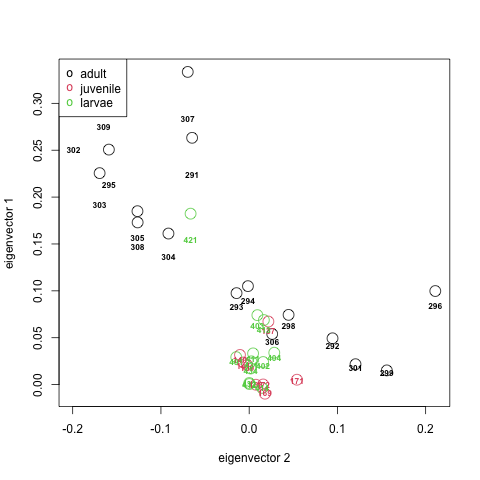

In [720]:
%%R
# Plot Dabob Bay 
plot(subset(tab, population=="Dabob Bay")$EV2, subset(tab, population=="Dabob Bay")$EV1,xlab="eigenvector 2", ylab="eigenvector 1",col=as.integer(subset(tab, population=="Dabob Bay")$stage), cex=2)
text(subset(tab, population=="Dabob Bay")$EV2, subset(tab, population=="Dabob Bay")$EV1*.85, labels=subset(tab, population=="Dabob Bay")$sample.id, cex=0.7, font=2, col=as.integer(subset(tab, population=="Dabob Bay")$stage))
legend("topleft", legend=paste(levels(subset(tab, population=="Dabob Bay")$stage)), pch="o", col=1:nlevels(tab$stage))

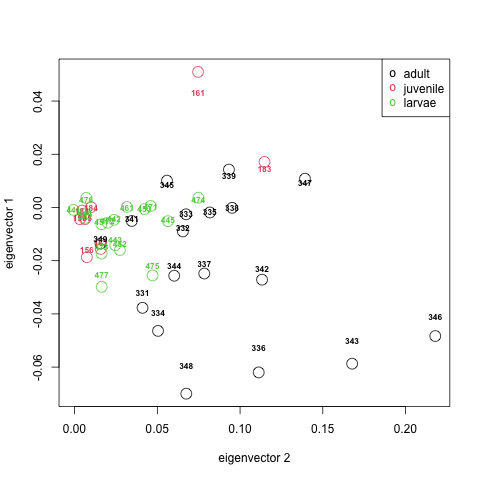

In [721]:
%%R
plot(subset(tab, population=="Fidalgo Bay")$EV2, subset(tab, population=="Fidalgo Bay")$EV1,xlab="eigenvector 2", ylab="eigenvector 1",col=as.integer(subset(tab, population=="Fidalgo Bay")$stage), cex=2)
text(subset(tab, population=="Fidalgo Bay")$EV2, subset(tab, population=="Fidalgo Bay")$EV1*.85, labels=subset(tab, population=="Fidalgo Bay")$sample.id, cex=0.7, font=2, col=as.integer(subset(tab, population=="Fidalgo Bay")$stage))
legend("topright", legend=paste(levels(subset(tab, population=="Fidalgo Bay")$stage)), pch="o", col=1:nlevels(tab$stage))

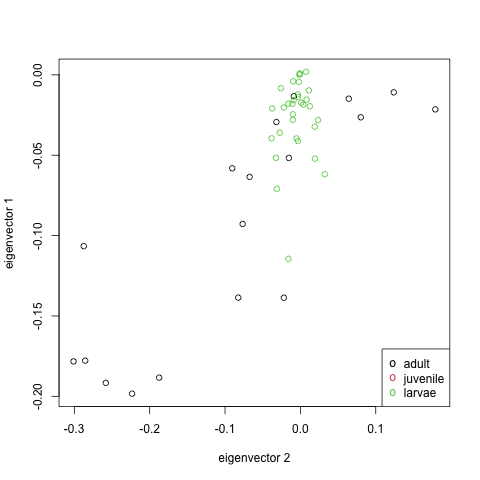

In [722]:
%%R
plot(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$EV2, subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$EV1,xlab="eigenvector 2", ylab="eigenvector 1",col=as.integer(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$stage), cex=1)
#text(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$EV2, subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$EV1*.85, labels=subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$sample.id, cex=0.7, font=2, col=as.integer(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$stage))
legend("bottomright", legend=paste(levels(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$stage)), pch="o", col=1:nlevels(tab$stage))

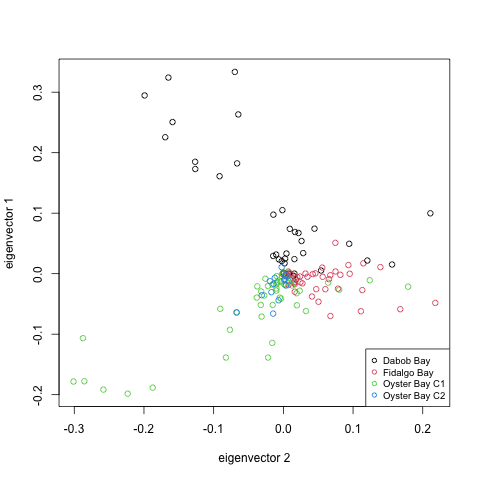

In [724]:
%%R
plot(tab$EV2, tab$EV1, xlab="eigenvector 2", ylab="eigenvector 1",
     col=as.integer(tab$population), cex=1)
#text(tab$EV2, tab$EV1*.85, labels=tab$sample.id, cex=0.7, font=2, col=as.integer(tab$pop_code))
legend("bottomright", legend=paste(levels(tab$population)), pch=1, cex=0.8, col=1:nlevels(tab$population))

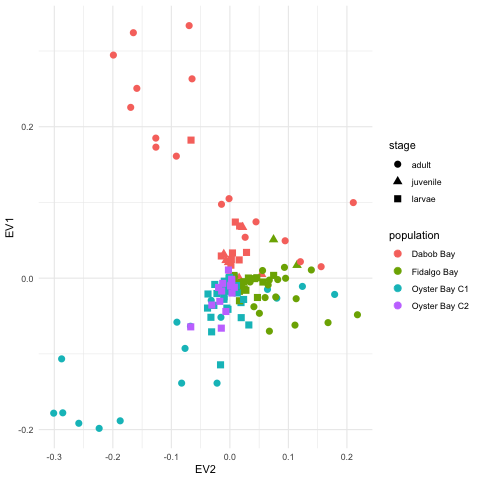

In [725]:
%%R
#ggplotly(
    ggplot(tab, aes(x=EV2, y=EV1, col=population, shape=stage)) + 
         geom_point(size=3) + theme_minimal()#)

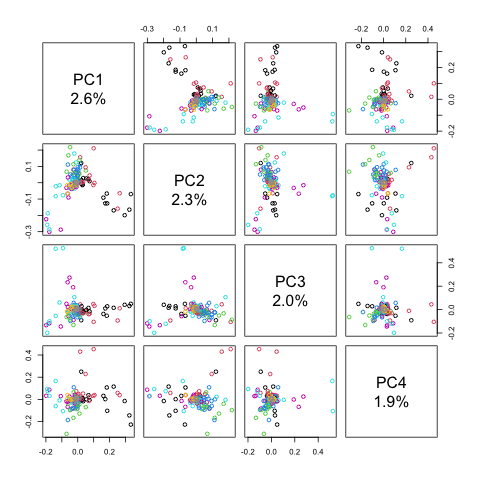

In [726]:
%%R
lbls <- paste("PC", 1:4, "\n", format(pc.percent[1:4], digits=2), "%", sep="")
pairs(pca$eigenvect[,1:4], col=tab$pop_code, labels=lbls)

### Fst Estimation

Compare all 4 groups

In [727]:
%%R
tab

    sample.id           EV1           EV2    stage    population pCO2.parent
1         034 -0.0180445733 -0.0106130473   larvae Oyster Bay C1     Ambient
2         035 -0.0121175965 -0.0033698707   larvae Oyster Bay C1     Ambient
3         037  0.0018245479  0.0074572828   larvae Oyster Bay C1     Ambient
4         039 -0.0322403836  0.0190363119   larvae Oyster Bay C1     Ambient
5         041 -0.0279336282 -0.0100824292   larvae Oyster Bay C1        High
6         043 -0.0203268009 -0.0220771263   larvae Oyster Bay C1        High
7         044  0.0002007830 -0.0012187436   larvae Oyster Bay C1        High
8         045  0.0003966516 -0.0009405959   larvae Oyster Bay C1        High
9         046 -0.0172741919  0.0010995055   larvae Oyster Bay C1        High
10        047 -0.0395449551 -0.0051236669   larvae Oyster Bay C1        High
11        137  0.0672559568  0.0217479386 juvenile     Dabob Bay     Ambient
12        139  0.0208885781 -0.0022685060 juvenile     Dabob Bay     Ambient

106       475 -0.0255262301  0.0471153798   larvae   Fidalgo Bay        High
107       476  0.0035677066  0.0070297381   larvae   Fidalgo Bay        High
108       477 -0.0298277361  0.0163628257   larvae   Fidalgo Bay        High
109       481 -0.0411605234 -0.0032681701   larvae Oyster Bay C1     Ambient
110       482 -0.0154211488  0.0081820125   larvae Oyster Bay C1     Ambient
111       483 -0.0195215110  0.0125788980   larvae Oyster Bay C1     Ambient
112       484 -0.0281165060  0.0234662858   larvae Oyster Bay C1     Ambient
113       485 -0.0516593047 -0.0323933450   larvae Oyster Bay C1     Ambient
114       487 -0.0209145801 -0.0374017977   larvae Oyster Bay C1     Ambient
115       488 -0.0245532493 -0.0099641464   larvae Oyster Bay C1     Ambient
116       489 -0.0360039069 -0.0274084329   larvae Oyster Bay C1     Ambient
117       490 -0.1144450151 -0.0159718033   larvae Oyster Bay C1     Ambient
118       491 -0.0044181036 -0.0020010216   larvae Oyster Bay C1     Ambient

In [791]:
%%R

v <- snpgdsFst(genofile, sample.id=head(read.gdsn(index.gdsn(genofile, "sample.id")), -1), 
               population=tab$pop_code,
    method="W&C84", autosome.only=FALSE)

Fst estimation on genotypes:
Excluding 5,748 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 145
    # of SNPs: 18,603
Method: Weir & Cockerham, 1984
# of Populations: 8
    Dabob Bay-Ambient (18), Dabob Bay-High (19), Fidalgo Bay-Ambient (20), Fidalgo Bay-High (23), Oyster Bay C1-Ambient (25), Oyster Bay C1-High (25), Oyster Bay C2-Ambient (7), Oyster Bay C2-High (8)


In [792]:
%%R
paste("Weir and Cockerham weighted Fst estimate: ", round(v$Fst, 5))

[1] "Weir and Cockerham weighted Fst estimate:  0.17517"


In [793]:
%%R
paste("Weir and Cockerham mean Fst estimate: ", round(v$MeanFst, 5))

[1] "Weir and Cockerham mean Fst estimate:  0.1822"


In [794]:
%%R
summary(v$FstSNP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.280   0.064   0.152   0.182   0.277   0.945   16792 


In [795]:
%%R
# Fidalgo Bay Adults
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Fidalgo Bay" & stage!="adult")$sample.id, 
               population=as.factor(subset(tab, population=="Fidalgo Bay" & stage!="adult")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, FB adults: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 19,391 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 25
    # of SNPs: 4,960
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (11), High (14)
[1] "Weir and Cockerham mean Fst estimate, FB adults:  0.16148"


In [796]:
%%R
# Fidalgo Bay Larvae
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Fidalgo Bay" & stage!="larvae")$sample.id, 
               population=as.factor(subset(tab, population=="Fidalgo Bay" & stage!="larvae")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, FB larvae: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 16,490 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 26
    # of SNPs: 7,861
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (13), High (13)
[1] "Weir and Cockerham mean Fst estimate, FB larvae:  0.16563"


In [797]:
%%R
# Fidalgo Bay Juveniles
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Fidalgo Bay" & stage!="juvenile")$sample.id, 
               population=as.factor(subset(tab, population=="Fidalgo Bay" & stage!="juvenile")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, FB juvenile: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 15,309 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 35
    # of SNPs: 9,042
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (16), High (19)
[1] "Weir and Cockerham mean Fst estimate, FB juvenile:  0.15197"


In [758]:
%%R
# Dabob Bay Adults
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Dabob Bay" & stage!="adult")$sample.id, 
               population=as.factor(subset(tab, population=="Dabob Bay" & stage!="adult")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, DB adults: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 20,055 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 20
    # of SNPs: 4,296
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (9), High (11)
[1] "Weir and Cockerham mean Fst estimate, DB adults:  0.19621"


In [759]:
%%R
# Dabob Bay Larvae
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Dabob Bay" & stage!="larvae")$sample.id, 
               population=as.factor(subset(tab, population=="Dabob Bay" & stage!="larvae")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, DB larvae: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 15,876 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 25
    # of SNPs: 8,475
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (13), High (12)
[1] "Weir and Cockerham mean Fst estimate, DB larvae:  0.14978"


In [760]:
%%R
# Dabob Bay Juveniles
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Dabob Bay" & stage!="juvenile")$sample.id, 
               population=as.factor(subset(tab, population=="Dabob Bay" & stage!="juvenile")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, DB juvenile: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 15,467 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 29
    # of SNPs: 8,884
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (14), High (15)
[1] "Weir and Cockerham mean Fst estimate, DB juvenile:  0.14458"


In [761]:
%%R
# Oyster Bay C1 Adults
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Oyster Bay C1" & stage!="adult")$sample.id, 
               population=as.factor(subset(tab, population=="Oyster Bay C1" & stage!="adult")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, OB1 adults: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 19,195 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 32
    # of SNPs: 5,156
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (16), High (16)
[1] "Weir and Cockerham mean Fst estimate, OB1 adults:  0.13941"


In [762]:
%%R
# Oyster Bay C1 Larvae
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Oyster Bay C1" & stage!="larvae")$sample.id, 
               population=as.factor(subset(tab, population=="Oyster Bay C1" & stage!="larvae")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, OB1 larvae: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 17,456 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 18
    # of SNPs: 6,895
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (9), High (9)
[1] "Weir and Cockerham mean Fst estimate, OB1 larvae:  0.12589"


In [763]:
%%R
# Oyster Bay C1 Juveniles
v <- snpgdsFst(genofile, sample.id=subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$sample.id, 
               population=as.factor(subset(tab, population=="Oyster Bay C1" & stage!="juvenile")$pCO2.parent),
    method="W&C84", autosome.only=FALSE)
paste("Weir and Cockerham mean Fst estimate, OB1 juvenile: ", round(v$MeanFst, 5))

Fst estimation on genotypes:
Excluding 13,857 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 50
    # of SNPs: 10,494
Method: Weir & Cockerham, 1984
# of Populations: 2
    Ambient (25), High (25)
[1] "Weir and Cockerham mean Fst estimate, OB1 juvenile:  0.12257"


### Identity-By-State Analysis 

In [801]:
%%R
ibs <- snpgdsIBS(genofile, num.thread=2, autosome.only=FALSE,
                sample.id=head(read.gdsn(index.gdsn(genofile, "sample.id")), -1))

Identity-By-State (IBS) analysis on genotypes:
Excluding 5,748 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 145
    # of SNPs: 18,603
    using 2 threads
IBS:    the sum of all selected genotypes (0,1,2) = 244569
Mon Mar 22 23:36:40 2021    (internal increment: 65536)
[==================================================] 100%, completed, 0s  
Mon Mar 22 23:36:40 2021    Done.


In [802]:
%%R
ncol(ibs$ibs)

[1] 145


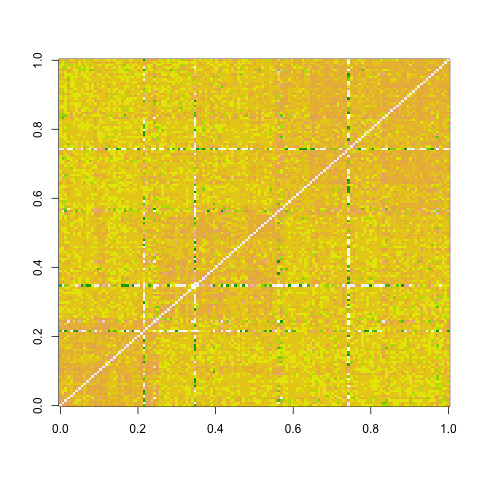

In [803]:
%%R
# heat map code from the SNPRelate tutorial - but don't know which samples are which! 
pop.idx <- order(tab$pop_code)
image(ibs$ibs[pop.idx, pop.idx], col=terrain.colors(16))

In [804]:
%%R
levels(tab$pop_code)

[1] "Dabob Bay-Ambient"     "Dabob Bay-High"        "Fidalgo Bay-Ambient"  
[4] "Fidalgo Bay-High"      "Oyster Bay C1-Ambient" "Oyster Bay C1-High"   
[7] "Oyster Bay C2-Ambient" "Oyster Bay C2-High"   


In [805]:
%%R
c("#a6cee3","#1f78b4","#b2df8a","#33a02c",
"#fb9a99","#e31a1c","#fdbf6f","#ff7f00")[tab$pop_code]

  [1] "#fb9a99" "#fb9a99" "#fb9a99" "#fb9a99" "#e31a1c" "#e31a1c" "#e31a1c"
  [8] "#e31a1c" "#e31a1c" "#e31a1c" "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3"
 [15] "#b2df8a" "#b2df8a" "#b2df8a" "#b2df8a" "#1f78b4" "#1f78b4" "#1f78b4"
 [22] "#1f78b4" "#33a02c" "#33a02c" "#33a02c" "#33a02c" "#1f78b4" "#1f78b4"
 [29] "#1f78b4" "#1f78b4" "#1f78b4" "#1f78b4" "#1f78b4" "#1f78b4" "#a6cee3"
 [36] "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3"
 [43] "#a6cee3" "#e31a1c" "#e31a1c" "#e31a1c" "#e31a1c" "#e31a1c" "#e31a1c"
 [50] "#e31a1c" "#e31a1c" "#e31a1c" "#fb9a99" "#fb9a99" "#fb9a99" "#fb9a99"
 [57] "#fb9a99" "#fb9a99" "#fb9a99" "#fb9a99" "#fb9a99" "#33a02c" "#33a02c"
 [64] "#33a02c" "#33a02c" "#33a02c" "#33a02c" "#33a02c" "#33a02c" "#33a02c"
 [71] "#b2df8a" "#b2df8a" "#b2df8a" "#b2df8a" "#b2df8a" "#b2df8a" "#b2df8a"
 [78] "#b2df8a" "#b2df8a" "#a6cee3" "#a6cee3" "#a6cee3" "#a6cee3" "#1f78b4"
 [85] "#1f78b4" "#1f78b4" "#1f78b4" "#a6cee3" "#1f78b4" "#1f78b4" "#1f78b4"
 [92] "#b2df

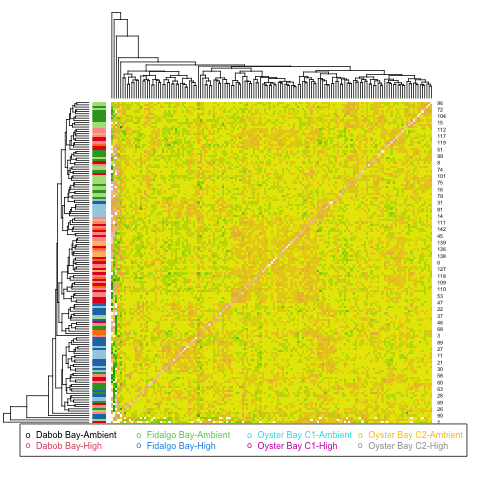

In [806]:
%%R
#so here is my own code showing sample 
par(xpd=TRUE)
heatmap(ibs$ibs, col=terrain.colors(16), labCol=TRUE, 
        RowSideColors=c("#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00")[tab$pop_code])
legend(-.1,-.05, legend=levels(tab$pop_code), pch="o", col=1:nlevels(tab$pop_code), text.col=1:nlevels(tab$pop_code), cex=.75, ncol=4)

In [807]:
%%R
nrow(ibs$ibs)

[1] 145


In [808]:
%%R
#To perform multidimensional scaling analysis on the matrix of genome-wide IBS pairwise distances:
loc <- cmdscale(1 - ibs$ibs, k = 2)
x <- loc[, 1]; y <- loc[, 2]
(group <- as.factor(tab$pop_code))

R[write to console]: Error in cmdscale(1 - ibs$ibs, k = 2) : NA values not allowed in 'd'




Error in cmdscale(1 - ibs$ibs, k = 2) : NA values not allowed in 'd'


In [809]:
%%R
plot(x, y, col=group, xlab = "", ylab = "",
    main = "Multidimensional Scaling Analysis (IBS)", cex=2, pch=16)
#text(x, y+.012, labels=tab$sample.id, cex=0.7, font=2, col=as.integer(group))
#legend("top", legend=levels(group), pch="o", text.col=1:nlevels(group))

R[write to console]: Error in plot(x, y, col = group, xlab = "", ylab = "", main = "Multidimensional Scaling Analysis (IBS)",  : 
  object 'x' not found




Error in plot(x, y, col = group, xlab = "", ylab = "", main = "Multidimensional Scaling Analysis (IBS)",  : 
  object 'x' not found


In [816]:
%%R
# To perform cluster analysis on the matrix of genome-wide IBS pairwise distances, 
# and determine the groups by a permutation score. 
# Result= only 1 group (?)
ibs.hc <- snpgdsHCluster(snpgdsIBS(genofile, 
                                   num.thread=2, autosome.only=FALSE,
                                   sample.id=head(read.gdsn(index.gdsn(genofile, "sample.id")), -1)))
rv <- snpgdsCutTree(ibs.hc)
plot(rv$dendrogram, leaflab="none", main="HapMap Phase II")

Identity-By-State (IBS) analysis on genotypes:
Excluding 5,748 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 145
    # of SNPs: 18,603
    using 2 threads
IBS:    the sum of all selected genotypes (0,1,2) = 244569
Mon Mar 22 23:39:14 2021    (internal increment: 65536)
[==================================================] 100%, completed, 0s  
Mon Mar 22 23:39:14 2021    Done.


R[write to console]: Error in hclust(as.dist(dist), method = "average") : 
  NA/NaN/Inf in foreign function call (arg 10)




Error in hclust(as.dist(dist), method = "average") : 
  NA/NaN/Inf in foreign function call (arg 10)


In [102]:
%%R
# indicates only 1 group 
table(rv$samp.group)


G001 
  16 


Create 4 groups.


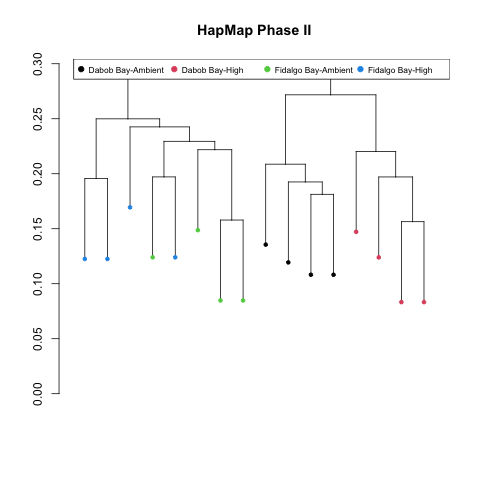

In [103]:
%%R
# Determine groups of individuals by population information
rv2 <- snpgdsCutTree(ibs.hc, samp.group=as.factor(tab$pop_code))
plot(rv2$dendrogram, leaflab="none", main="HapMap Phase II")
legend("topright", legend=levels(group), col=1:nlevels(group), pch=19, ncol=4, cex=0.7, pt.cex=1)

In [178]:
%%R
# this is how you close the GDS file! 
snpgdsClose(genofile)

# Colony analysis

## Prepare files for Colony sibship analysis

Colony identifies siblings, which I would like to do with my juveniles. Here I prepare files for Colony.

Mac suggested that I only keep SNPs with very high minor allele frequencies (AF <30%). Here I create a new .vcf with that filter. 

In [288]:
#! {gatk} VariantsToTable \
#     -V ../qc-processing/gatk/juvenile_genotypes-SNPs.vcf.gz \
#     -F CHROM -F POS -F QUAL -GF AC -GF AF -GF InbreedingCoeff \
#     -O ../qc-processing/gatk/output.table

Using GATK jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar VariantsToTable -V ../qc-processing/gatk/juvenile_genotypes-SNPs.vcf.gz -F CHROM -F POS -F QUAL -GF AC -GF AF -GF InbreedingCoeff -O ../qc-processing/gatk/output.table
12:10:47.878 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
Mar 05, 2021 12:10:48 PM shaded.cloud_nio.com.google.auth.oauth2.ComputeEngineCredentials runningOnComputeEngine
INFO: Failed to detect whether we are running on Google Compute Engine.
12:10:48.339 INFO  VariantsToTable - ------------------------------------------------------------
12

In [342]:
! {gatk} VariantFiltration \
-R ../references/Olurida_v081.fa \
-V ../qc-processing/gatk/juvenile_genotypes-SNPs.vcf.gz \
-O ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz \
--filter-name "FS" \
--filter "FS > 60.0" \
--filter-name "QD" \
--filter "QD < 2.0" \
--filter-name "QUAL30" \
--filter "QUAL < 30.0" \
--filter-name "SOR3" \
--filter "SOR > 3.0" \
--filter-name "DP15" \
--filter "DP < 15" \
--filter-name "DP150" \
--filter "DP < 150" \
--filter-name "AF30" \
--filter "AF < 0.30"

Using GATK jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar VariantFiltration -R ../references/Olurida_v081.fa -V ../qc-processing/gatk/juvenile_genotypes-SNPs.vcf.gz -O ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz --filter-name FS --filter FS > 60.0 --filter-name QD --filter QD < 2.0 --filter-name QUAL30 --filter QUAL < 30.0 --filter-name SOR3 --filter SOR > 3.0 --filter-name DP15 --filter DP < 15 --filter-name DP150 --filter DP < 150 --filter-name AF30 --filter AF < 0.30
17:05:01.487 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
Mar 05, 2021 5:05:01

17:05:07.764 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.625, 0.063])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:07.817 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.438, 0.094])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.009 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.219, 0.781])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.067 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.167, 0.208])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.156 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.375, 0.031])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.271 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.313, 0.438])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.295 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.267, 0.067])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.346 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.214, 0.143])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.395 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.769, 0.231])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.accept(ForEachOps.java:183) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.stream.ReferencePipeline$2$1.accept(ReferencePipeline.java:177) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.Iterator.forEachRemaining(Iterator.java:133) [?:?]
	at java.base/java.util.Spliterators$IteratorSpliterator.forEachRemaining(Spliterators.java:1801) [?:?]
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484) [?:?]
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp.evaluateSequential(ForEachOps.java:150) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.evaluateSequential(ForEachOps.java:173) [?:?]
	at java.base/java.util.stream.AbstractPipeline.evaluate(A

17:05:08.516 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.250, 0.156])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.577 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.300, 0.050])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.612 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.625, 0.031])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.662 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.071, 0.500, 0.036])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.varian

17:05:08.725 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.750, 0.083])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex


	at org.broadinstitute.hellbender.Main.main(Main.java:289) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
17:05:08.772 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.136, 0.091])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evalua

17:05:08.824 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.300, 0.100])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.894 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.500, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.932 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.115, 0.615])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:08.993 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.100, 0.100])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.AbstractPipeline.evaluate(AbstractPipeline.java:234) [?:?]
	at java.base/java.util.stream.ReferencePipeline.forEach(ReferencePipeline.java:497) [?:?]
	at org.broadinstitute.hellbender.engine.VariantWalker.traverse(VariantWalker.java:102) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.GATKTool.doWork(GATKTool.java:1049) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.runTool(CommandLineProgram.java:140) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMainPostParseArgs(CommandLineProgram.java:192) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMain(CommandLineProgram.java:211) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.Main.runCommandLineProgram(Main.java:160) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadin

17:05:09.088 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.063, 0.063])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.161 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.875, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.196 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.094, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.247 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.500, 0.036])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.314 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.500, 0.500])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:09.416 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.938, 0.063])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.464 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.400, 0.167])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.515 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.063, 0.500])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.583 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.125, 0.063])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.635 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.375, 0.094])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.680 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.615, 0.385])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.729 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.400, 0.133])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex


	at org.broadinstitute.hellbender.Main.main(Main.java:289) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
17:05:09.779 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.083, 0.083])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evalua

17:05:09.833 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.531, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.887 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.077, 0.385])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:09.943 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.875, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:10.099 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.250, 0.750])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:10.206 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.333, 0.333])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.259 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.179, 0.107])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.314 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.467, 0.033])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.368 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.800, 0.200])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.420 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.857, 0.143])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.476 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.200, 0.300])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.accept(ForEachOps.java:183) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.stream.ReferencePipeline$2$1.accept(ReferencePipeline.java:177) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.Iterator.forEachRemaining(Iterator.java:133) [?:?]
	at java.base/java.util.Spliterators$IteratorSpliterator.forEachRemaining(Spliterators.java:1801) [?:?]
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484) [?:?]
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp.evaluateSequential(ForEachOps.java:150) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.evaluateSequential(ForEachOps.java:173) [?:?]
	at java.base/java.util.stream.AbstractPipeline.evaluate(A

17:05:10.636 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.906, 0.094])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.688 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.063, 0.063])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.738 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.250, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.789 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.875, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.848 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.594, 0.188])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.908 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.031, 0.031])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:10.982 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.958, 0.042])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.014 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.167, 0.167])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:11.149 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.077, 0.038])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.AbstractPipeline.evaluate(AbstractPipeline.java:234) [?:?]
	at java.base/java.util.stream.ReferencePipeline.forEach(ReferencePipeline.java:497) [?:?]
	at org.broadinstitute.hellbender.engine.VariantWalker.traverse(VariantWalker.java:102) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.GATKTool.doWork(GATKTool.java:1049) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.runTool(CommandLineProgram.java:140) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMainPostParseArgs(CommandLineProgram.java:192) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMain(CommandLineProgram.java:211) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.Main.runCommandLineProgram(Main.java:160) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadin

17:05:11.242 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.100, 0.700])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.AbstractPipeline.evaluate(AbstractPipeline.java:234) [?:?]
	at java.base/java.util.stream.ReferencePipeline.forEach(ReferencePipeline.java:497) [?:?]
	at org.broadinstitute.hellbender.engine.VariantWalker.traverse(VariantWalker.java:102) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.GATKTool.doWork(GATKTool.java:1049) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.runTool(CommandLineProgram.java:140) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMainPostParseArgs(CommandLineProgram.java:192) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMain(CommandLineProgram.java:211) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.Main.runCommandLineProgram(Main.java:160) [gatk-package-4.1.9.0-local.jar:4.1.9.0]

	at org.broadi

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:11.411 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.500, 0.500])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.459 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.150, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.AbstractPipeline.evaluate(AbstractPipeline.java:234) [?:?]
	at java.base/java.util.stream.ReferencePipeline.forEach(ReferencePipeline.java:497) [?:?]
	at org.broadinstitute.hellbender.engine.VariantWalker.traverse(VariantWalker.java:102) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.GATKTool.doWork(GATKTool.java:1049) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.runTool(CommandLineProgram.java:140) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMainPostParseArgs(CommandLineProgram.java:192) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMain(CommandLineProgram.java:211) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.Main.runCommandLineProgram(Main.java:160) [gatk-package-4.1.9.0-local.jar:4.1.9.0]

	at org.broadi

17:05:11.569 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.111, 0.056])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at java.base/java.util.stream.AbstractPipeline.evaluate(AbstractPipeline.java:234) [?:?]
	at java.base/java.util.stream.ReferencePipeline.forEach(ReferencePipeline.java:497) [?:?]
	at org.broadinstitute.hellbender.engine.VariantWalker.traverse(VariantWalker.java:102) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.GATKTool.doWork(GATKTool.java:1049) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.runTool(CommandLineProgram.java:140) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMainPostParseArgs(CommandLineProgram.java:192) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.cmdline.CommandLineProgram.instanceMain(CommandLineProgram.java:211) [gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.Main.runCommandLineProgram(Main.java:160) [gatk-package-4.1.9.0-local.jar:4.1.9.0]

	at org.broadi

	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.accept(ForEachOps.java:183) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.stream.ReferencePipeline$2$1.accept(ReferencePipeline.java:177) [?:?]
	at java.base/java.util.stream.ReferencePipeline$3$1.accept(ReferencePipeline.java:195) [?:?]
	at java.base/java.util.Iterator.forEachRemaining(Iterator.java:133) [?:?]
	at java.base/java.util.Spliterators$IteratorSpliterator.forEachRemaining(Spliterators.java:1801) [?:?]
	at java.base/java.util.stream.AbstractPipeline.copyInto(AbstractPipeline.java:484) [?:?]
	at java.base/java.util.stream.AbstractPipeline.wrapAndCopyInto(AbstractPipeline.java:474) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp.evaluateSequential(ForEachOps.java:150) [?:?]
	at java.base/java.util.stream.ForEachOps$ForEachOp$OfRef.evaluateSequential(ForEachOps.java:173) [?:?]
	at java.base/java.util.stream.AbstractPipeline.evaluate(A

17:05:11.731 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.219, 0.156])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.776 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.125, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.831 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.464, 0.143])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.889 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.594, 0.281])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.942 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.875, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:11.991 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.083, 0.042])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:12.098 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.750, 0.250])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

17:05:12.148 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.333, 0.333])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

	at htsjdk.variant.variantcontext.JEXLMap.evaluateExpression(JEXLMap.java:186) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:95) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.JEXLMap.get(JEXLMap.java:15) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontext.VariantContextUtils.match(VariantContextUtils.java:338) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.matchesFilter(VariantFiltration.java:453) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.filter(VariantFiltration.java:407) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.tools.walkers.filters.VariantFiltration.apply(VariantFiltration.java:354) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.broadinstitute.hellbender.engine.VariantWalker.lambda$traverse$0(Varia

17:05:12.257 WARN  JexlEngine - ![0,9]: 'AF < 0.30;' < error
java.lang.ArithmeticException: Double coercion: java.util.ArrayList:([0.125, 0.125])
	at org.apache.commons.jexl2.JexlArithmetic.toDouble(JexlArithmetic.java:1023) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.compare(JexlArithmetic.java:699) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.JexlArithmetic.lessThan(JexlArithmetic.java:774) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.visit(Interpreter.java:967) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.parser.ASTLTNode.jjtAccept(ASTLTNode.java:18) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.Interpreter.interpret(Interpreter.java:232) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at org.apache.commons.jexl2.ExpressionImpl.evaluate(ExpressionImpl.java:65) ~[gatk-package-4.1.9.0-local.jar:4.1.9.0]
	at htsjdk.variant.variantcontex

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [343]:
# Now create another filtered .vcf that excludes any variants not meeting the above hard-filter settings 
! {gatk} SelectVariants \
-R ../references/Olurida_v081.fa \
-V ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz \
--exclude-filtered TRUE \
--max-nocall-number 0 \
-O ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf.gz

Using GATK jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar SelectVariants -R ../references/Olurida_v081.fa -V ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz --exclude-filtered TRUE --max-nocall-number 0 -O ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf.gz
17:05:15.637 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Applications/bioinformatics/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
Mar 05, 2021 5:05:15 PM shaded.cloud_nio.com.google.auth.oauth2.ComputeEngineCredentials runningOnComputeEngine
INFO: Failed to detect whether we are running on Google Compute Engine.
17:05:15.979 INFO  SelectVariants - 

In [344]:
# Total # SNP variants before filtering for only SNPs
! zgrep "^Contig" ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony.vcf.gz | wc -l 

# Confirm that I did indeed filter only SNPs
! zgrep "^Contig" ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf.gz | wc -l 
! zgrep "PASS" ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf.gz | wc -l 

   56497
    3222
    3223


In [345]:
! gzip -dkf ../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf.gz

In [346]:
%%R
# 
vcf.fn.colony <- "../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf"
vcf.fn.colony

[1] "../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf"


In [347]:
%%R
# if you get an error with the next chunk, run this one 
snpgdsClose(genofile4Colony)

In [348]:
%%R
# Reformat - note, can't re-run this chucnk
snpgdsVCF2GDS(vcf.fn.colony, "../qc-processing/gatk/juvenile4Colony.gds", method="biallelic.only")

Start file conversion from VCF to SNP GDS ...
Method: exacting biallelic SNPs
Number of samples: 16
Parsing "../qc-processing/gatk/juvenile_genotypes-SNPs4Colony-filteredtrue.vcf" ...
	import 2988 variants.
+ genotype   { Bit2 16x2988, 11.7K } *
Optimize the access efficiency ...
Clean up the fragments of GDS file:
    open the file '../qc-processing/gatk/juvenile4Colony.gds' (35.3K)
    # of fragments: 46
    save to '../qc-processing/gatk/juvenile4Colony.gds.tmp'
    rename '../qc-processing/gatk/juvenile4Colony.gds.tmp' (35.0K, reduced: 312B)
    # of fragments: 20


In [349]:
%%R
# View summary 
snpgdsSummary("../qc-processing/gatk/juvenile4Colony.gds")

The file name: /Volumes/Bumblebee/O.lurida_QuantSeq-2020/qc-processing/gatk/juvenile4Colony.gds 
The total number of samples: 16 
The total number of SNPs: 2988 
SNP genotypes are stored in SNP-major mode (Sample X SNP).


In [350]:
%%R
#open gds and check out genofile contents 
(genofile4Colony <- snpgdsOpen("../qc-processing/gatk/juvenile4Colony.gds"))

File: /Volumes/Bumblebee/O.lurida_QuantSeq-2020/qc-processing/gatk/juvenile4Colony.gds (35.0K)
+    [  ] *
|--+ sample.id   { Str8 16 LZMA_ra(178.1%), 121B }
|--+ snp.id   { Int32 2988 LZMA_ra(13.4%), 1.6K }
|--+ snp.rs.id   { Str8 2988 LZMA_ra(3.41%), 109B }
|--+ snp.position   { Int32 2988 LZMA_ra(42.4%), 5.0K }
|--+ snp.chromosome   { Str8 2988 LZMA_ra(9.79%), 3.4K }
|--+ snp.allele   { Str8 2988 LZMA_ra(15.3%), 1.8K }
|--+ genotype   { Bit2 16x2988, 11.7K } *
\--+ snp.annot   [  ]
   |--+ qual   { Float32 2988 LZMA_ra(79.8%), 9.3K }
   \--+ filter   { Str8 2988 LZMA_ra(0.92%), 145B }


In [351]:
%%R
# Prune SNPs in linkage-disequilibrium 
snpset4Colony <- snpgdsLDpruning(genofile4Colony, ld.threshold=0.2, autosome.only=FALSE)

SNP pruning based on LD:
Excluding 3 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 16
    # of SNPs: 2,985
    using 1 thread
    sliding window: 500,000 basepairs, Inf SNPs
    |LD| threshold: 0.2
    method: composite
Chromosome Contig100081: 50.00%, 1/2
Chromosome Contig100403: 100.00%, 1/1
Chromosome Contig100441: 16.67%, 1/6
Chromosome Contig100774: 33.33%, 1/3
Chromosome Contig10117: 50.00%, 1/2
Chromosome Contig101546: 66.67%, 2/3
Chromosome Contig101586: 33.33%, 1/3
Chromosome Contig1016: 100.00%, 1/1
Chromosome Contig101859: 33.33%, 1/3
Chromosome Contig101868: 50.00%, 1/2
Chromosome Contig10230: 100.00%, 1/1
Chromosome Contig102689: 100.00%, 1/1
Chromosome Contig102899: 100.00%, 1/1
Chromosome Contig102975: 100.00%, 1/1
Chromosome Contig103044: 25.00%, 1/4
Chromosome Contig103455: 50.00%, 1/2
Chromosome Contig103503: 33.33%, 1/3
Chromosome Contig103511: 100.00%, 1/1
Chromosome Contig103524: 50.00%, 1/2
Chromosome Contig103565: 100.00%, 1/1
Chromosome

Chromosome Contig16494: 50.00%, 1/2
Chromosome Contig1651: 100.00%, 1/1
Chromosome Contig165410: 100.00%, 1/1
Chromosome Contig16586: 50.00%, 1/2
Chromosome Contig16788: 50.00%, 1/2
Chromosome Contig16844: 100.00%, 1/1
Chromosome Contig168553: 100.00%, 1/1
Chromosome Contig168670: 50.00%, 1/2
Chromosome Contig16877: 100.00%, 1/1
Chromosome Contig168844: 100.00%, 1/1
Chromosome Contig16889: 100.00%, 1/1
Chromosome Contig168902: 50.00%, 1/2
Chromosome Contig16901: 16.67%, 1/6
Chromosome Contig169410: 100.00%, 1/1
Chromosome Contig169539: 25.00%, 1/4
Chromosome Contig16969: 100.00%, 1/1
Chromosome Contig170: 25.00%, 1/4
Chromosome Contig1701: 50.00%, 1/2
Chromosome Contig170258: 100.00%, 1/1
Chromosome Contig1705: 50.00%, 1/2
Chromosome Contig170685: 25.00%, 1/4
Chromosome Contig170729: 50.00%, 1/2
Chromosome Contig17091: 100.00%, 1/1
Chromosome Contig170943: 33.33%, 1/3
Chromosome Contig17117: 50.00%, 1/2
Chromosome Contig17120: 50.00%, 1/2
Chromosome Contig171204: 50.00%, 1/2
Chromosome

Chromosome Contig23231: 100.00%, 1/1
Chromosome Contig23245: 100.00%, 1/1
Chromosome Contig23253: 33.33%, 1/3
Chromosome Contig23341: 50.00%, 1/2
Chromosome Contig23413: 100.00%, 1/1
Chromosome Contig23456: 100.00%, 1/1
Chromosome Contig23544: 100.00%, 1/1
Chromosome Contig235597: 33.33%, 1/3
Chromosome Contig23630: 100.00%, 1/1
Chromosome Contig23663: 100.00%, 1/1
Chromosome Contig23693: 50.00%, 1/2
Chromosome Contig23697: 50.00%, 1/2
Chromosome Contig23722: 33.33%, 1/3
Chromosome Contig23872: 100.00%, 1/1
Chromosome Contig23915: 50.00%, 1/2
Chromosome Contig23936: 20.00%, 1/5
Chromosome Contig24001: 20.00%, 1/5
Chromosome Contig24058: 100.00%, 1/1
Chromosome Contig24059: 11.11%, 1/9
Chromosome Contig24069: 100.00%, 1/1
Chromosome Contig24087: 33.33%, 1/3
Chromosome Contig24096: 100.00%, 1/1
Chromosome Contig24097: 100.00%, 1/1
Chromosome Contig24098: 50.00%, 1/2
Chromosome Contig241: 33.33%, 1/3
Chromosome Contig24100: 25.00%, 1/4
Chromosome Contig24120: 100.00%, 1/1
Chromosome Conti

Chromosome Contig31702: 100.00%, 1/1
Chromosome Contig31717: 14.29%, 1/7
Chromosome Contig31718: 100.00%, 1/1
Chromosome Contig31800: 100.00%, 1/1
Chromosome Contig31901: 100.00%, 1/1
Chromosome Contig31915: 100.00%, 1/1
Chromosome Contig31952: 50.00%, 1/2
Chromosome Contig320: 33.33%, 1/3
Chromosome Contig32011: 100.00%, 1/1
Chromosome Contig32033: 20.00%, 1/5
Chromosome Contig32051: 100.00%, 1/1
Chromosome Contig32245: 25.00%, 1/4
Chromosome Contig32277: 100.00%, 1/1
Chromosome Contig32290: 33.33%, 1/3
Chromosome Contig3241: 100.00%, 1/1
Chromosome Contig32500: 50.00%, 1/2
Chromosome Contig3260: 50.00%, 1/2
Chromosome Contig32669: 50.00%, 1/2
Chromosome Contig32753: 100.00%, 1/1
Chromosome Contig32859: 100.00%, 1/1
Chromosome Contig32869: 50.00%, 1/2
Chromosome Contig3289: 100.00%, 1/1
Chromosome Contig328985: 50.00%, 1/2
Chromosome Contig32970: 50.00%, 1/2
Chromosome Contig33065: 100.00%, 1/1
Chromosome Contig33096: 100.00%, 1/1
Chromosome Contig33110: 100.00%, 1/1
Chromosome Contig

Chromosome Contig42622: 50.00%, 1/2
Chromosome Contig42633: 25.00%, 1/4
Chromosome Contig42731: 100.00%, 1/1
Chromosome Contig42756: 20.00%, 1/5
Chromosome Contig42783: 100.00%, 1/1
Chromosome Contig42820: 100.00%, 1/1
Chromosome Contig42862: 25.00%, 1/4
Chromosome Contig4292: 33.33%, 1/3
Chromosome Contig42983: 50.00%, 1/2
Chromosome Contig43032: 100.00%, 1/1
Chromosome Contig43036: 100.00%, 1/1
Chromosome Contig43076: 25.00%, 1/4
Chromosome Contig43111: 20.00%, 1/5
Chromosome Contig43124: 100.00%, 1/1
Chromosome Contig43205: 100.00%, 1/1
Chromosome Contig43271: 100.00%, 1/1
Chromosome Contig43285: 16.67%, 1/6
Chromosome Contig43340: 50.00%, 1/2
Chromosome Contig4351: 50.00%, 1/2
Chromosome Contig43538: 100.00%, 1/1
Chromosome Contig43625: 100.00%, 1/1
Chromosome Contig436365: 25.00%, 1/4
Chromosome Contig43669: 100.00%, 1/1
Chromosome Contig43703: 20.00%, 1/5
Chromosome Contig43722: 50.00%, 1/2
Chromosome Contig43724: 100.00%, 1/1
Chromosome Contig43965: 50.00%, 1/2
Chromosome Contig

Chromosome Contig5833: 50.00%, 1/2
Chromosome Contig58367: 100.00%, 1/1
Chromosome Contig5837: 100.00%, 1/1
Chromosome Contig58452: 100.00%, 1/1
Chromosome Contig58628: 50.00%, 1/2
Chromosome Contig58847: 25.00%, 1/4
Chromosome Contig58898: 50.00%, 1/2
Chromosome Contig589: 100.00%, 1/1
Chromosome Contig58929: 100.00%, 1/1
Chromosome Contig58976: 50.00%, 1/2
Chromosome Contig59041: 100.00%, 1/1
Chromosome Contig59113: 100.00%, 1/1
Chromosome Contig59138: 100.00%, 1/1
Chromosome Contig59183: 100.00%, 1/1
Chromosome Contig59428: 100.00%, 1/1
Chromosome Contig59596: 50.00%, 1/2
Chromosome Contig596915: 100.00%, 1/1
Chromosome Contig59806: 33.33%, 1/3
Chromosome Contig59916: 100.00%, 1/1
Chromosome Contig6: 50.00%, 1/2
Chromosome Contig6017: 100.00%, 1/1
Chromosome Contig60174: 100.00%, 1/1
Chromosome Contig60348: 100.00%, 1/1
Chromosome Contig60380: 100.00%, 1/1
Chromosome Contig60381: 50.00%, 1/2
Chromosome Contig60459: 50.00%, 1/2
Chromosome Contig60519: 100.00%, 1/1
Chromosome Contig60

Chromosome Contig8313: 100.00%, 1/1
Chromosome Contig83223: 100.00%, 1/1
Chromosome Contig83263: 100.00%, 1/1
Chromosome Contig83421: 50.00%, 1/2
Chromosome Contig83474: 100.00%, 1/1
Chromosome Contig83649: 50.00%, 1/2
Chromosome Contig83690: 33.33%, 1/3
Chromosome Contig837: 50.00%, 1/2
Chromosome Contig84112: 50.00%, 1/2
Chromosome Contig84462: 100.00%, 1/1
Chromosome Contig84494: 100.00%, 1/1
Chromosome Contig84562: 20.00%, 1/5
Chromosome Contig84684: 50.00%, 1/2
Chromosome Contig84691: 50.00%, 1/2
Chromosome Contig84765: 100.00%, 1/1
Chromosome Contig84790: 100.00%, 1/1
Chromosome Contig84791: 50.00%, 1/2
Chromosome Contig84858: 50.00%, 1/2
Chromosome Contig85216: 50.00%, 1/2
Chromosome Contig85309: 33.33%, 1/3
Chromosome Contig8532: 100.00%, 1/1
Chromosome Contig8556: 20.00%, 1/5
Chromosome Contig85833: 50.00%, 1/2
Chromosome Contig86: 50.00%, 1/2
Chromosome Contig86124: 18.18%, 2/11
Chromosome Contig86326: 100.00%, 1/1
Chromosome Contig86522: 100.00%, 1/1
Chromosome Contig86587: 

## 1,489 markers in total

In [352]:
%%R
snpset4Colony.id <- unlist(unname(snpset4Colony))
head(snpset4Colony.id)

[1]  1  3  8 12 13 16


In [353]:
%%R
snpgdsGetGeno(genofile4Colony)[,1:13]

Genotype matrix: 16 samples X 2988 SNPs
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    1    1    2    2    0    2    2    2    2     1     2     1     2
 [2,]    1    1    2    1    1    1    2    2    1     1     2     1     2
 [3,]    1    1    2    1    1    1    2    2    1     1     1     1     2
 [4,]    2    2    2    1    2    0    1    2    0     1     2     1     2
 [5,]    2    1    2    1    1    1    1    1    1     0     2     0     0
 [6,]    1    1    0    2    0    2    2    2    2     0     1     0     0
 [7,]    1    1    0    1    1    1    2    2    1     1     2     1     1
 [8,]    1    1    0    0    2    0    0    0    0     0     1     0     0
 [9,]    1    1    2    1    1    1    1    1    1     1     1     1     1
[10,]    1    1    2    1    1    1    1    1    1     0     1     0     1
[11,]    1    1    2    1    1    1    2    2    1     0     1     0     1
[12,]    1    1    2    1    1    1    1    1    1     0    

In [354]:
%%R
# Extract genotypes for LD-pruned SNPs, then save to file 
snpgdsCreateGenoSet(src.fn="../qc-processing/gatk/juvenile4Colony.gds",
                    dest.fn="../qc-processing/gatk/juvenile4Colony-pruned.gds",
                    snp.id=snpset4Colony.id)

Create a GDS genotype file:
The new dataset consists of 16 samples and 1489 SNPs
    write sample.id
    write snp.id
    write snp.rs.id
    write snp.position
    write snp.chromosome
    write snp.allele
SNP genotypes are stored in SNP-major mode (Sample X SNP).


In [355]:
%%R
geno.matrix4Colony <- snpgdsGetGeno(gdsobj="../qc-processing/gatk/juvenile4Colony-pruned.gds", with.id=TRUE)

Genotype matrix: 16 samples X 1489 SNPs


In [356]:
%%R
str(geno.matrix4Colony)

List of 3
 $ genotype : int [1:16, 1:1489] 1 1 1 2 2 1 1 1 1 1 ...
 $ sample.id: chr [1:16] "137" "139" "140" "141" ...
 $ snp.id   : int [1:1489] 1 3 8 12 13 16 17 19 21 22 ...


In [357]:
%%R
geno.matrix4Colony$sample.id

 [1] "137" "139" "140" "141" "156" "159" "161" "162" "168" "169" "171" "172"
[13] "181" "183" "184" "185"


In [358]:
%%R
# Write genotypes to file. NOTE: these are dominant alleles, so only 1 column per marker 
write_delim(cbind(sampleID=paste("O", geno.matrix4Colony$sample.id, sep=""), 
                  as.data.frame(geno.matrix4Colony$genotype)), 
            file="../qc-processing/colony/geno.matrix.tab", delim="   ", col_names=FALSE)

In [359]:
%%R
cbind(sampleID=paste("O", geno.matrix4Colony$sample.id, sep=""), as.data.frame(geno.matrix4Colony$genotype))[1:16,1:10]

   sampleID V1 V2 V3 V4 V5 V6 V7 V8 V9
1      O137  1  2  2  1  2  2  0  1  1
2      O139  1  2  2  1  2  2  0  2  1
3      O140  1  2  2  1  2  1  0  1  1
4      O141  2  2  2  1  2  2  0  2  1
5      O156  2  2  1  0  0  0  0  1  1
6      O159  1  0  2  0  0  1  0  2  0
7      O161  1  0  2  1  1  1  1  1  1
8      O162  1  0  0  0  0  1  1  1  1
9      O168  1  2  1  1  1  1  0  1  2
10     O169  1  2  1  0  1  2  0  1  1
11     O171  1  2  2  0  1  2  0  2  1
12     O172  1  2  1  0  1  1  0  2  1
13     O181  1  1  1  1  0  2  1  1  2
14     O183  1  1  1  0  1  1  1  1  0
15     O184  1  1  1  1  1  1  1  1  0
16     O185  1  0  1  0  0  2  1  2  1


## Created the Colony input file by hand using the genotype file created above 

add more details here 

## View results of Colony 